# MULTI PRECISION A.I:


# Imports:


In [1]:
import pandas as pd
from pandas import Timestamp
import numpy as np
from datetime import datetime


#to plot within notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

import google_sheets_api as sheet #connection to server


In [2]:
#AI Librarys 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


# Download Stock Data:

In [3]:
def getAllSheets():
    sheet_aapl = sheet.AAPL_data.get_all_values() 
    sheet_amzn = sheet.AMZN_data.get_all_values()
    sheet_csco = sheet.CSCO_data.get_all_values()
    sheet_fb = sheet.FB_data.get_all_values()
    sheet_googl = sheet.GOOGL_data.get_all_values()
    sheet_IBM = sheet.IBM_data.get_all_values()
    sheet_intc = sheet.INTC_data.get_all_values()
    sheet_msft = sheet.MSFT_data.get_all_values()
    sheet_orcl = sheet.ORCL_data.get_all_values()
    sheet_qcom = sheet.QCOM_data.get_all_values()
    sheet_tsla = sheet.TSLA_data.get_all_values()
    sheet_vz = sheet.VZ_data.get_all_values()

    sheet_aapl = sheet_aapl[1:] #remove column names title
    sheet_amzn = sheet_amzn[1:] #remove column names title
    sheet_csco = sheet_csco[1:] #remove column names title
    sheet_fb = sheet_fb[1:] #remove column names title
    sheet_googl = sheet_googl[1:] #remove column names title
    sheet_intc = sheet_intc[1:] #remove column names title
    sheet_msft = sheet_msft[1:] #remove column names title
    sheet_IBM = sheet_IBM[1:] #remove column names title
    sheet_orcl = sheet_orcl[1:] #remove column names title
    sheet_qcom = sheet_qcom[1:] #remove column names title
    sheet_tsla = sheet_tsla[1:] #remove column names title
    sheet_vz = sheet_vz[1:] #remove column names title


    
    AAPL_data = pd.DataFrame(sheet_aapl, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    AMZN_data = pd.DataFrame(sheet_amzn, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    CSCO_data = pd.DataFrame(sheet_csco, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    FB_data = pd.DataFrame(sheet_fb, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    GOOGL_data = pd.DataFrame(sheet_googl, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    INTC_data = pd.DataFrame(sheet_intc, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    MSFT_data = pd.DataFrame(sheet_msft, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    IBM_data = pd.DataFrame(sheet_IBM, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    ORCL_data = pd.DataFrame(sheet_orcl, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    QCOM_data = pd.DataFrame(sheet_qcom, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    TSLA_data = pd.DataFrame(sheet_tsla, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    VZ_data = pd.DataFrame(sheet_vz, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 


    return [AAPL_data, AMZN_data, CSCO_data, FB_data, GOOGL_data, INTC_data, MSFT_data, IBM_data, ORCL_data, QCOM_data, TSLA_data, VZ_data]

    
all_stock_data = getAllSheets()  ##THIS VAR HOLDS ALL OF THE STOCK DATA


# Reformat Server Data to Fit A.I. Model:

In [4]:
df_AAPL = all_stock_data[0] #AAPL
df_AMZN = all_stock_data[1] #AMZN
df_CSCO = all_stock_data[2] #CSCO
df_FB = all_stock_data[3] #FB
df_GOOGL = all_stock_data[4] #GOOGL
df_INTC = all_stock_data[5] #INTC
df_MSFT = all_stock_data[6] #MSFT
df_IBM = all_stock_data[7] #IBM
df_ORCL = all_stock_data[8] #ORCL
df_QCOM = all_stock_data[9] #QCOM
df_TLSA = all_stock_data[10] #TSLA
df_VZ = all_stock_data[11] #VZ

all_stock_dataframes = [df_AAPL, df_AMZN, df_CSCO, df_FB, df_GOOGL, df_INTC, df_MSFT, df_IBM, df_ORCL, df_QCOM, df_TLSA, df_VZ]

In [5]:
count = 0

for df in all_stock_dataframes:  
    df['open'] = df['open'].astype(float)
    df['high'] = df['high'].astype(float)
    df['low'] = df['low'].astype(float)
    df['close'] = df['close'].astype(float)
    df['volume'] = df['volume'].astype(int)
    #for index, row in df.iterrows():    
        #if row['timestamp'].endswith('-05:00'):
    #df['timestamp'].iloc[index] = row['timestamp'][:-6]
               
    df.index = df['timestamp']
    print(count, "of ", len(all_stock_dataframes), "stock dataframes successfully reformatted")
    count+=1

print("All data successfully reformatted!")

0 of  12 stock dataframes successfully reformatted
1 of  12 stock dataframes successfully reformatted
2 of  12 stock dataframes successfully reformatted
3 of  12 stock dataframes successfully reformatted
4 of  12 stock dataframes successfully reformatted
5 of  12 stock dataframes successfully reformatted
6 of  12 stock dataframes successfully reformatted
7 of  12 stock dataframes successfully reformatted
8 of  12 stock dataframes successfully reformatted
9 of  12 stock dataframes successfully reformatted
10 of  12 stock dataframes successfully reformatted
11 of  12 stock dataframes successfully reformatted
All data successfully reformatted!


In [6]:
total_rows = df_AAPL.count()
print(total_rows['close'] +1)

#raining_data_split = int(total_rows['close']*0.945) #80% of the data becomes train data
training_data_split = 717
print(training_data_split)

721
717


In [7]:
def determine_ticker(ticker):
    if (ticker == 'AAPL'):
        return df_AAPL
    if (ticker == 'AMZN'):
        return df_AMZN
    if (ticker == 'CSCO'):
        return df_CSCO
    if (ticker == 'FB'):
        return df_FB
    if (ticker == 'GOOGL'):
        return df_GOOGL
    if (ticker == 'INTC'):
        return df_INTC
    if (ticker == 'MSFT'):
        return df_MSFT
    if (ticker == 'IBM'):
        return df_IBM
    if (ticker == 'ORCL'):
        return df_ORCL
    if (ticker == 'QCOM'):
        return df_QCOM
    if (ticker == 'TLSA'):
        return df_TLSA
    if (ticker == 'VZ'):
        return df_VZ

In [8]:
def split_by_day(df):
    day_splits = [0]
    #print(df['tradingDay'])
    iterator_day = df['tradingDay'].iloc[0]
    #print(iterator_day)
    counter = 0
    for index, row in df.iterrows():
        counter += 1
        #print(row['tradingDay'])
        if (iterator_day == row['tradingDay']):
            continue
        else:
            day_splits.append(counter)
            iterator_day = row['tradingDay']
    return day_splits
    
    
    

# LONG SHORT TERM MEMORY MACHINE LEARNING (MULIPLE INPUTS):

In [9]:
def LSTM_prediction_multi_precision3(symbol, sensitivity, prediction_date , data_points):
    totalInputs = len(data_points)
    print("stock symbol:",symbol)
    print("sensitivity:",sensitivity)
    pred_datetime = datetime(int(prediction_date[0:4]), int(prediction_date[5:6]), int(prediction_date[7:9]))
    print("Date to be predicted: ",pred_datetime)
    print("Day of the week: ", pred_datetime.weekday())
    print("total Inputs:",totalInputs)
    
    current_stock_df = determine_ticker(symbol)
    daySplits = split_by_day(current_stock_df)
    total_rows = len(current_stock_df.index)
    daySplits.append(total_rows)
    print(daySplits)
    
    
    #creating dataframe
    data = current_stock_df.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(current_stock_df)),columns=['timestamp', data_points[0], data_points[1],data_points[2],data_points[3],data_points[4]])

    
    #creating a new_data DF for manipulation
    for i in range(0,len(data)):
        new_data['timestamp'][i] = data['timestamp'][i]
        new_data[data_points[0]][i] = data[data_points[0]][i]
        new_data[data_points[1]][i] = data[data_points[1]][i]
        new_data[data_points[2]][i] = data[data_points[2]][i]
        new_data[data_points[3]][i] = data[data_points[3]][i]
        new_data[data_points[4]][i] = data[data_points[4]][i]

        
    #setting index to timestamp 
    new_data.index = new_data.timestamp
    new_data.drop('timestamp', axis=1, inplace=True)

    #creating train and test sets
    dataset = new_data.values 

    train = dataset[0:training_data_split,:] #TRAINGING 80%
    valid = dataset[training_data_split:,:] #DATA POINTS TO BE PREDICTED 20%
    
    #converting dataset into x_train and y_train
    scaler = MinMaxScaler(feature_range=(0, 1))   #NORMALIZARION between O and 1 of the data
    scaled_data = scaler.fit_transform(dataset)   #FITS OUR DATA SET TO THE NORMALIZATION BETWEEN ONE AND ZERO
      
    #Spliting the data into X train and Y Train
    x_train, y_train = [], []
    for i in range(50,len(train)):
        x_train.append(scaled_data[i-50:i,:])
        y_train.append(scaled_data[i,1])

    
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],totalInputs))  
  
    #print("x_train.shape:", x_train.shape)
    #print("x_train.shape:", x_train)
    
    # create and fit the LSTM network
    model = Sequential() 
    #print(type(model))

    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],totalInputs))) #2 input
    model.add(LSTM(units=30, return_sequences=True))
    model.add(LSTM(units=30))
    model.add(Dense(units=1))
    #model.summary()
    
    #print(x_train.shape)

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=sensitivity, batch_size=32)  #EPOCHS determine sensitivity
    model.summary()
    
    #predicting values, using past 50 from the train data
    inputs = new_data[len(new_data) - len(valid) - 50:].values
    #print(len(new_data))
    #print(len(valid))
    
   # print("INPUTS shape:",inputs.shape)
    #print("INPUTS:",inputs)
    
    inputs = inputs.reshape(-1,totalInputs)  
    print("INPUTS shape:",inputs.shape)
    #print(inputs)

    inputs  = scaler.transform(inputs)

    
    X_test = []
    for i in range(50,inputs.shape[0]):
        X_test.append(inputs[i-50:i,:])
    
    
    
    
    X_test = np.array(X_test)


    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],totalInputs))
   #print("X_test: ", X_test)

   
    print("X_tests.shape: ", X_test.shape) 
    print("X_tests: ", X_test) 

    predictons = model.predict(X_test) #PREDICTIONS
   # print(predictons.shape)
    
    formated_preds = np.zeros((predictons.shape[0],predictons.shape[1]+(totalInputs-1)))
    formated_preds[:,:-1] = predictons

    predictons = scaler.inverse_transform(formated_preds) #DE NORMALIZARION
    
   # print("PREDS: ", predictons)
    #For Plotting
    train = new_data[:training_data_split]
    valid = new_data[training_data_split:]
   
    valid['Predictions'] = predictons[: , :1]
    valid['Percent Error'] = valid.apply(lambda row: (row.iloc[0]-row.iloc[5])/row.iloc[0]*100, axis=1)

    valid['Predictions']
    
    # Find local peaks
    valid['min'] = valid['Predictions'][(valid['Predictions'].shift(1) > valid['Predictions']) & (valid['Predictions'].shift(-1) > valid['Predictions'])]
    valid['max'] = valid['Predictions'][(valid['Predictions'].shift(1) < valid['Predictions']) & (valid['Predictions'].shift(-1) < valid['Predictions'])]

    #print(valid)
    
    print("The avg Percent error:", round(abs(valid['Percent Error']).mean(),3))
    
    plt.figure(figsize=(15,10))
    for i in range(len(daySplits)):
        plt.axvline(x=daySplits[i],linestyle='--',color='g')
    
    plt.plot(train[data_points[0]], 'b')
    plt.plot(valid[data_points[0]], 'c')
    plt.plot(valid['Predictions'], color='orange')
    
    plt.xlabel('timestamp')
    plt.ylabel(data_points[0])
    plt.title(symbol)
    plt.legend(prop={'size': 15})
    plt.show()
    
    #Graph 2 - just predictions
    plt.figure(figsize=(15,10))
    
    plt.xlabel('Datetime')
    plt.ylabel('Price')
    plt.title(symbol + " " + str(current_stock_df['tradingDay'].iloc[-1]))
    plt.xticks(rotation=90)

    plt.plot(valid[data_points[0]], 'c')
    plt.plot(valid['Predictions'], color='orange')
    
    plt.plot(valid['min'], '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='blue',
         markeredgewidth=2)
    
    plt.plot(valid['max'], '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
    
    plt.legend(prop={'size': 15})
    plt.show()

stock symbol: AAPL
sensitivity: 1
Date to be predicted:  2019-03-04 00:00:00
Day of the week:  0
total Inputs: 5
[0, 41, 81, 121, 161, 201, 241, 281, 321, 361, 401, 441, 481, 521, 561, 601, 641, 681, 720]
Instructions for updating:
Colocations handled automatically by placer.


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Instructions for updating:
Use tf.cast instead.
Epoch 1/1
667/667 [==============================] - 4s 6ms/step - loss: 0.0584
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            11200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 30)            9720      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 28,271
Trainable params: 28,271
Non-trainable params: 0
_________________________________________________________________
INPUTS shape: (53, 5)
X_tests.shape:  (3, 50, 5)
X_tests:  [[[0.65058058 0.66657262 0.6833555  0.62620192 0.07608734]
  [0.66587452 0.69126049

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

The avg Percent error: 1.385


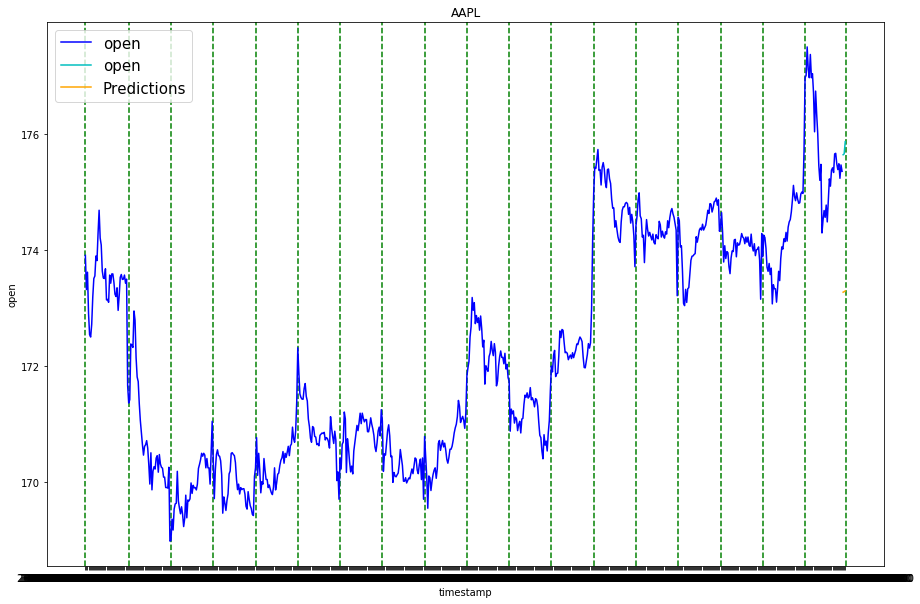

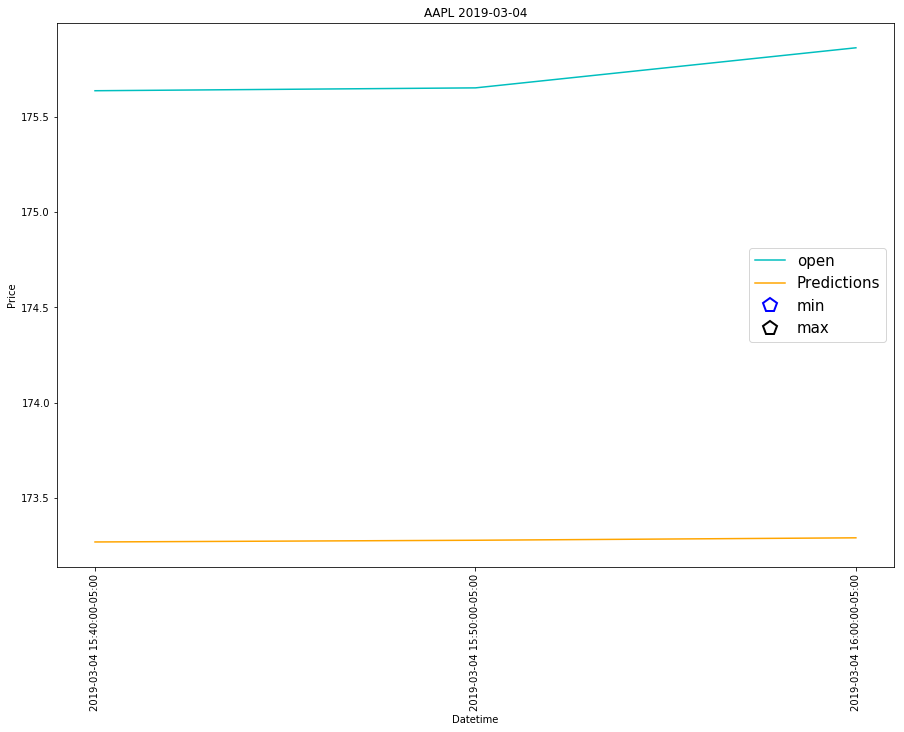

In [10]:
LSTM_prediction_multi_precision3('AAPL', 1, "20190304", ['open','close','low','high','volume'])
#LSTM_prediction_multi_precision3('AMZN', 1, "20190304", ['open','close','low','high','volume'])
#LSTM_prediction_multi_precision3('CSCO', 30,  "20190304", ['open','close','low','high','volume'])
#LSTM_prediction_multi_precision3('FB', 30,  "20190304", ['open','close','low','high','volume'])
#LSTM_prediction_multi_precision3('GOOGL', 30,  "20190304", ['open','close','low','high','volume'])
#LSTM_prediction_multi_precision3('INTC', 30, "20190304", ['open','close','low','high','volume'])
#LSTM_prediction_multi_precision3('MSFT', 30,  "20190304",['open','close','low','high','volume'])
#LSTM_prediction_multi_precision3('IBM', 30,  "20190304", ['open','close','low','high','volume'])
#LSTM_prediction_multi_precision3('ORCL', 30, "20190304", ['open','close','low','high','volume'])
#LSTM_prediction_multi_precision3('QCOM', 30, "20190304", ['open','close','low','high','volume'])
#LSTM_prediction_multi_precision3('TLSA', 30, "20190304", ['open','close','low','high','volume'])
#LSTM_prediction_multi_precision3('VZ', 30, "20190304", ['open','close','low','high','volume'])

#Stock OPTIONS: AAPL, AMZN, CSCO, FB, GOOGL,INTC, MSFT, IBM, ORCL, QCOM, TLSA, VZ
#predictionDate in form YYYYMMDD - 20190304

# True Prediction

In [11]:
def set_data_split(current_stock_df):
    total_rows = current_stock_df.count()
    training_data_split = int(total_rows['close']*0.945) #80% of the data becomes train data
    #training_data_split = 717
    return training_data_split

In [12]:
def manipulated_data(symbol, data_points):
    current_stock_df = determine_ticker(symbol)
    daySplits = split_by_day(current_stock_df)
    total_rows = len(current_stock_df.index)
    daySplits.append(total_rows)
    print(daySplits)
    
    #creating dataframe
    data = current_stock_df.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(current_stock_df)),columns=['timestamp', data_points[0], data_points[1],data_points[2],data_points[3],data_points[4]])

    
    #creating a new_data DF for manipulation
    for i in range(0,len(data)):
        new_data['timestamp'][i] = data['timestamp'][i]
        new_data[data_points[0]][i] = data[data_points[0]][i]
        new_data[data_points[1]][i] = data[data_points[1]][i]
        new_data[data_points[2]][i] = data[data_points[2]][i]
        new_data[data_points[3]][i] = data[data_points[3]][i]
        new_data[data_points[4]][i] = data[data_points[4]][i]

        
    #setting index to timestamp 
    new_data.index = new_data.timestamp
    new_data.drop('timestamp', axis=1, inplace=True)
    
    return current_stock_df, new_data, daySplits 


In [13]:
def create_LSTM_model(formatted_data, sensitivity, data_points, training_data_split, day_split):
    lookback = 75
    totalInputs = len(data_points)
    #creating train and test sets
    dataset = formatted_data.values 

    train = dataset[0:training_data_split,:] #TRAINGING 80%
    valid = dataset[training_data_split:,:] #DATA POINTS TO BE PREDICTED 20%
    
    #converting dataset into x_train and y_train
    scaler = MinMaxScaler(feature_range=(0, 1))   #NORMALIZARION between O and 1 of the data
    scaled_data = scaler.fit_transform(dataset)   #FITS OUR DATA SET TO THE NORMALIZATION BETWEEN ONE AND ZERO
      
    #Spliting the data into X train and Y Train
    x_train, y_train = [], []
    for i in range(lookback,len(train)):
        x_train.append(scaled_data[i-lookback:i,:])
        y_train.append(scaled_data[i,1])

    
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],totalInputs))  
 
    # create and fit the LSTM network
    model = Sequential() 
    model.add(LSTM(units=lookback, return_sequences=True, input_shape=(x_train.shape[1],totalInputs))) #2 input
    model.add(LSTM(units=30, return_sequences=True))
    model.add(LSTM(units=30))
    model.add(Dense(units=1))
    #model.summary()

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=sensitivity, batch_size=32)  #EPOCHS determine sensitivity
    model.summary()
    
    ####################################################################################################################
    
    #predicting values, using past lookback from the train data
    inputs = formatted_data[len(formatted_data) - len(valid) - lookback: len(formatted_data) - len(valid)].values
    inputs = inputs.reshape(-1,totalInputs) 
    
    to_be_predicted = len(valid)
    
    print("len(formatted_data):", len(formatted_data))
    print("len(valid):", len(valid))
    print("len(formatted_data) - len(valid) - lookback:", len(formatted_data) - len(valid) - lookback)
    
    #print(inputs)
   # print(inputs.shape)
    
    inputs  = scaler.transform(inputs)
    
    X_test = []
    overall_predictions = []
    X_test.append(inputs)
    for x in range(to_be_predicted):
        
        X_test = np.array(X_test)
        

        predictons = model.predict(X_test) #PREDICTIONS 
        formated_preds = np.zeros((predictons.shape[0],predictons.shape[1]+(totalInputs-1)))
        formated_preds[:,:-1] = predictons
        predictons = scaler.inverse_transform(formated_preds) #DE NORMALIZARION

        updated_xtests = []
        updated_xtests = np.concatenate((X_test[-1], [predictons[-1]]), axis=0)
        
        updated_xtests = updated_xtests[1:]
        updated_xtests = np.reshape(updated_xtests, (1,updated_xtests.shape[0],updated_xtests.shape[1]))

        X_test = np.concatenate((X_test, updated_xtests), axis=0)
        #X_test = np.reshape(X_test, (1,X_test.shape[0],X_test.shape[1]))
       # print("X_test: ", X_test.shape)
        overall_predictions.append(predictons[-1][0])

    
       
    overall_predictions = np.array(overall_predictions)
    #overall_predictions = np.reshape(overall_predictions, (overall_predictions.shape[0], 1))
    print("overall_predictions: ", overall_predictions)
    
    print(overall_predictions.shape)
    #For Plotting
    train = formatted_data[:training_data_split]
    valid = formatted_data[training_data_split:]

    print("valid len:", len(valid))
    print(valid)
    
    valid['Predictions'] = overall_predictions
    valid['Percent Error'] = valid.apply(lambda row: (abs(row.iloc[0]-row.iloc[5])/row.iloc[0]*100), axis=1)
    print(valid)

    # Find local peaks
    valid['min'] = valid['Predictions'][(valid['Predictions'].shift(1) > valid['Predictions']) & (valid['Predictions'].shift(-1) > valid['Predictions'])]
    valid['max'] = valid['Predictions'][(valid['Predictions'].shift(1) < valid['Predictions']) & (valid['Predictions'].shift(-1) < valid['Predictions'])]
    #print("The avg Percent error:", round(abs(valid['Percent Error']).mean(),3))
    
    plt.figure(figsize=(15,10))
    for i in range(len(day_split)):
        plt.axvline(x=day_split[i],linestyle='--',color='g')
    
    plt.plot(train[data_points[0]], 'b')
    plt.plot(valid[data_points[0]], 'c')
    plt.plot(valid['Predictions'], color='orange')
    
    plt.xlabel('timestamp')
    plt.ylabel(data_points[0])
    plt.title(symbol)
    plt.legend(prop={'size': 15})
    plt.show()
    
    #Graph 2 - just predictions
    plt.figure(figsize=(15,10))
    
    plt.xlabel('Datetime')
    plt.ylabel('Price')
    plt.title(symbol + " " + str(current_stock_df['tradingDay'].iloc[-1]))
    plt.xticks(rotation=90)

    plt.plot(valid[data_points[0]], 'c')
    plt.plot(valid['Predictions'], color='orange')
    
    plt.plot(valid['min'], '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='blue',
         markeredgewidth=2)
    
    plt.plot(valid['max'], '-p', color='gray',
         markersize=15, linewidth=0,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
    
    plt.legend(prop={'size': 15})
    plt.show()
    
    
    #Graph 3 Errors
    plt.figure(figsize=(15,10))
    
    plt.xlabel('Datetime')
    plt.ylabel('Error (%)')
    plt.title("Percent Error Over the course of prediction")
    plt.xticks(rotation=90)

    plt.plot(valid['Percent Error'], color='red')
    
    plt.legend(prop={'size': 15})
    plt.show()

[0, 41, 81, 121, 161, 201, 241, 281, 321, 361, 401, 441, 481, 521, 561, 601, 641, 681, 720]


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/150
605/605 [==============================] - 5s 9ms/step - loss: 0.0330
Epoch 2/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0063
Epoch 3/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0044
Epoch 4/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0040
Epoch 5/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0039
Epoch 6/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0039
Epoch 7/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0036
Epoch 8/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0035
Epoch 9/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0033
Epoch 10/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0031
Epoch 11/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0029
Epoch 12/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0029
Epoch 13/150


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

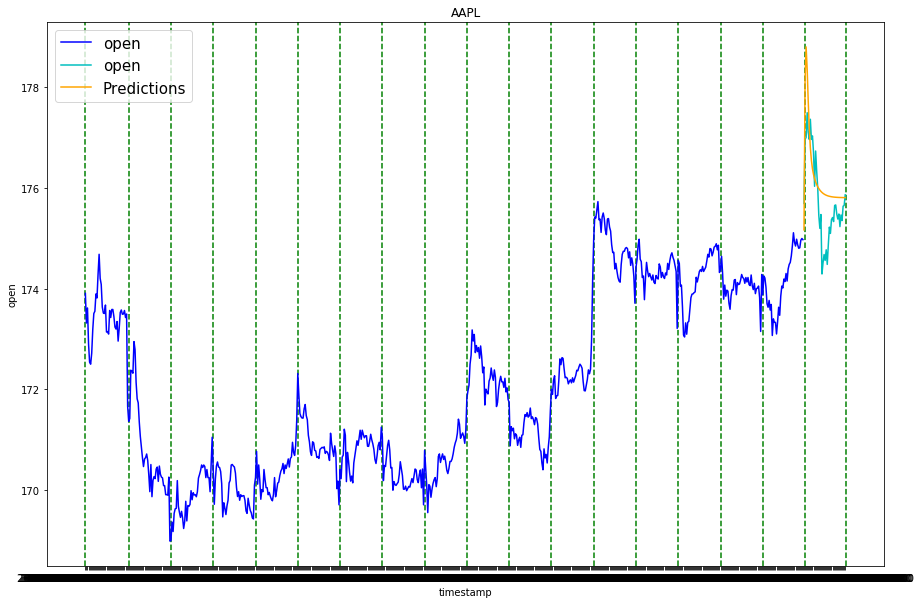

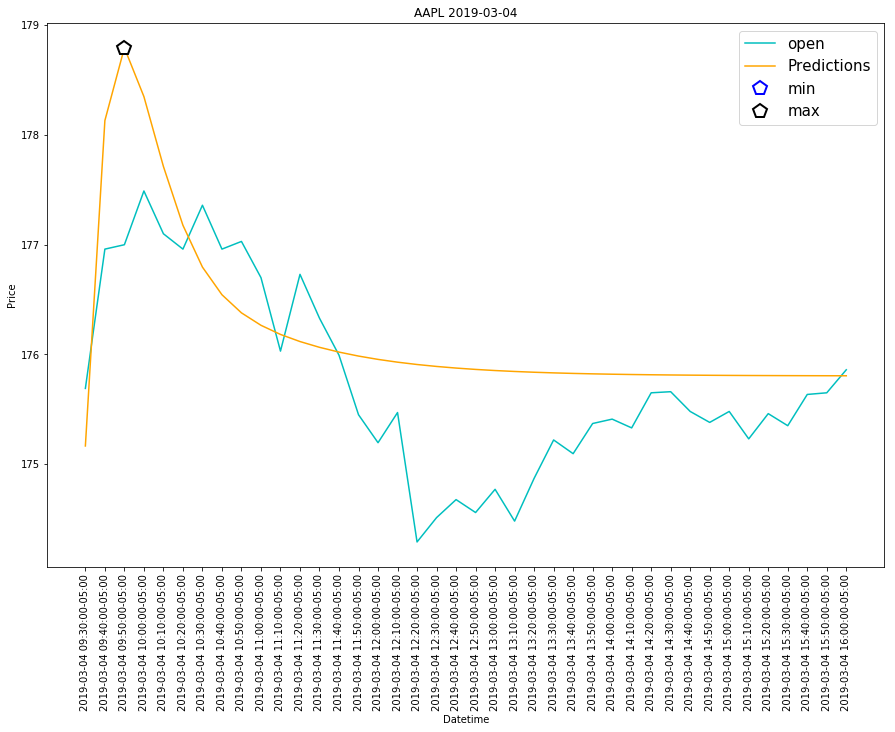

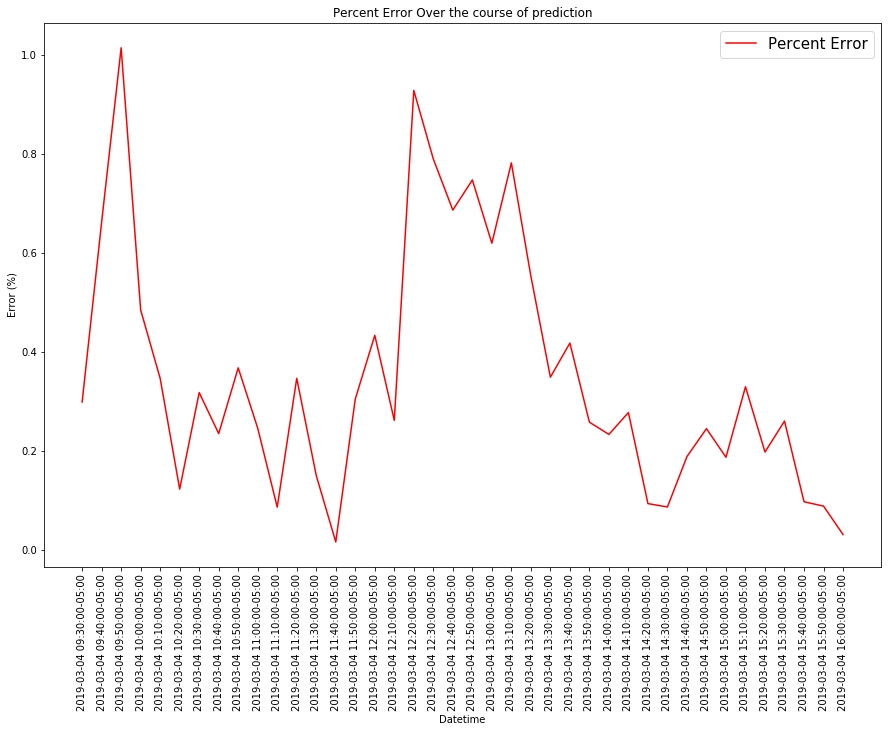

In [15]:
symbol = 'AAPL'
data_points = ['open','close','low','high','volume']
sensitivity = 150

current_stock_df, new_data, day_split = manipulated_data(symbol, data_points) #symbol and what to use
training_data_split = set_data_split(current_stock_df)

create_LSTM_model(new_data, sensitivity, data_points, training_data_split, day_split) #formatted data, and epoch sensitivity, what to use 


[0, 41, 81, 121, 161, 201, 241, 281, 321, 361, 401, 441, 481, 521, 561, 601, 641, 681, 720]


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/150
605/605 [==============================] - 6s 10ms/step - loss: 0.0309
Epoch 2/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0062
Epoch 3/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0048
Epoch 4/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0042
Epoch 5/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0038
Epoch 6/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0035
Epoch 7/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0033
Epoch 8/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0030
Epoch 9/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0030
Epoch 10/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0028
Epoch 11/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0026
Epoch 12/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0026
Epoch 13/150

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                              open    close      low     high  volume  \
timestamp                                                               
2019-03-04 09:30:00-05:00     1685  1697.45   1684.2  1697.75  382600   
2019-03-04 09:40:00-05:00  1697.53  1695.65   1695.2  1699.53  157114   
2019-03-04 09:50:00-05:00  1695.51  1697.38  1693.63     1698  110921   
2019-03-04 10:00:00-05:00  1697.75  1700.16  1697.75     1705  212179   
2019-03-04 10:10:00-05:00  1700.49     1703  1698.76   1703.2   93424   
2019-03-04 10:20:00-05:00  1702.92  1708.16     1701  1708.77  130294   
2019-03-04 10:30:00-05:00   1708.4     1705  1702.53  1709.43  149457   
2019-03-04 10:40:00-05:00  1705.24  1707.57   1703.5     1709   70638   
2019-03-04 10:50:00-05:00   1707.7  1702.55  1701.75   1708.8   74182   
2019-03-04 11:00:00-05:00  1702.13  1695.56     1695  1703.49  132643   
2019-03-04 11:10:00-05:00  1695.33  1699.27     1695   1699.5   67188   
2019-03-04 11:20:00-05:00  1699.73  1693.69  1693.6

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


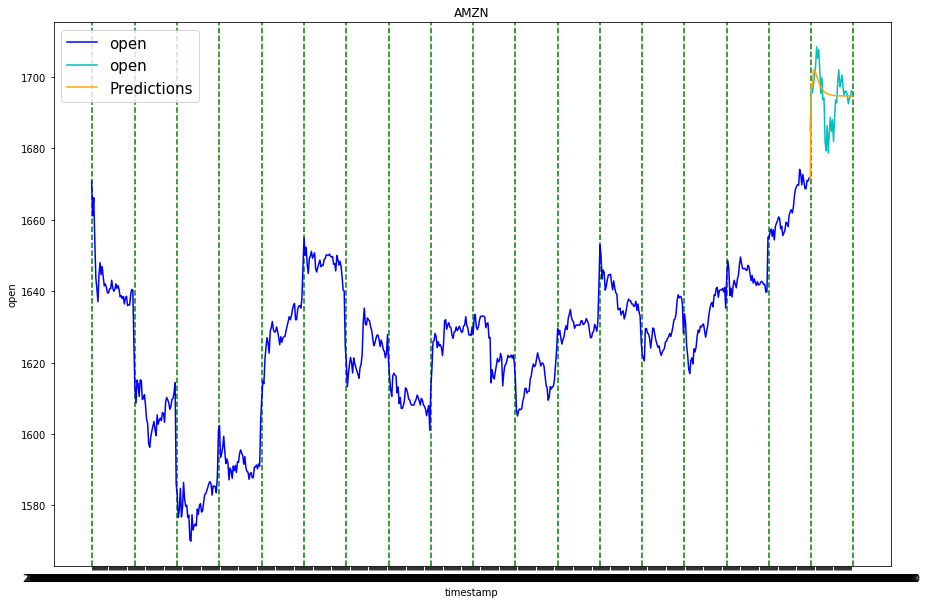

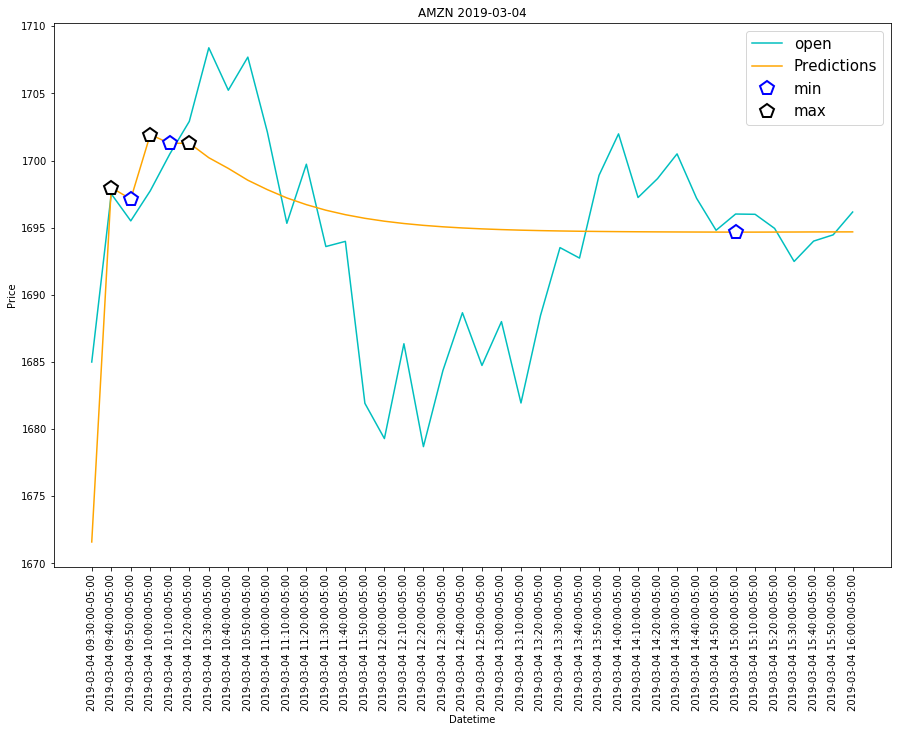

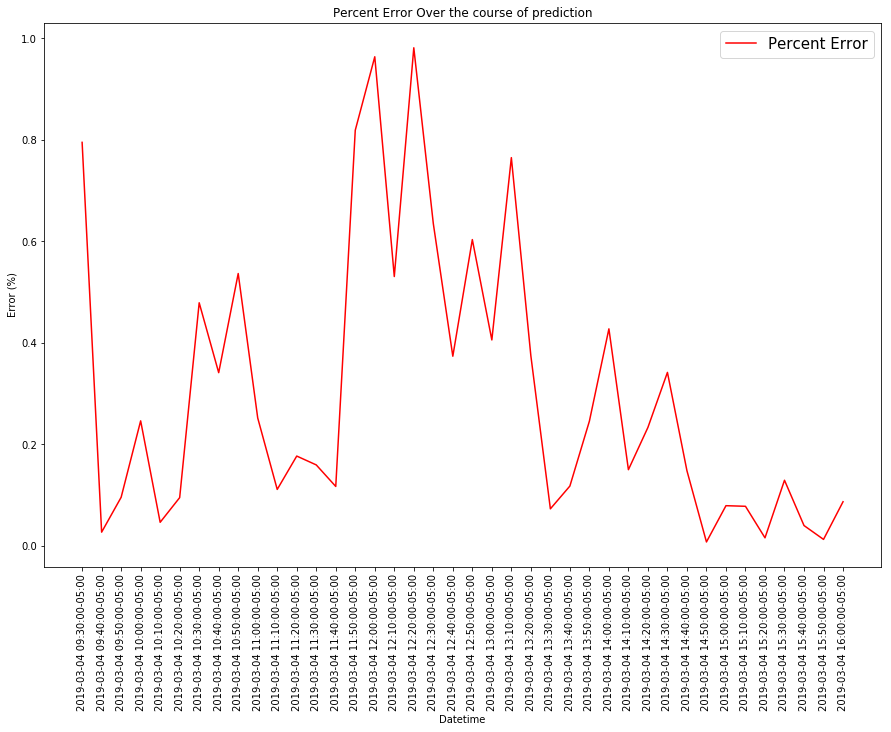

In [21]:
symbol = 'AMZN'
data_points = ['open','close','low','high','volume']
sensitivity = 150

current_stock_df, new_data, day_split = manipulated_data(symbol, data_points) #symbol and what to use
training_data_split = set_data_split(current_stock_df)

create_LSTM_model(new_data, sensitivity, data_points, training_data_split, day_split) #formatted data, and epoch sensitivity, what to use 




[0, 41, 81, 121, 161, 201, 241, 281, 321, 361, 401, 441, 481, 521, 561, 601, 641, 681, 720]


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/150
605/605 [==============================] - 7s 11ms/step - loss: 0.0585
Epoch 2/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0090
Epoch 3/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0035
Epoch 4/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0025
Epoch 5/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0023
Epoch 6/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0022
Epoch 7/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0021
Epoch 8/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0021
Epoch 9/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0021
Epoch 10/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0020
Epoch 11/150
605/605 [==============================] - 4s 6ms/step - loss: 0.0020
Epoch 12/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0020
Epoch 13/150

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

                              open    close      low    high   volume  \
timestamp                                                               
2019-03-04 09:30:00-05:00    51.65   51.785    51.63  51.835   775210   
2019-03-04 09:40:00-05:00    51.78     51.8    51.76   51.86   325031   
2019-03-04 09:50:00-05:00     51.8    51.87    51.76   51.88   280086   
2019-03-04 10:00:00-05:00    51.87    51.81   51.785   51.92   581200   
2019-03-04 10:10:00-05:00  51.8085    51.71     51.7   51.82   324496   
2019-03-04 10:20:00-05:00    51.71    51.67    51.62   51.71   310200   
2019-03-04 10:30:00-05:00    51.68    51.65    51.63    51.7   247748   
2019-03-04 10:40:00-05:00    51.65    51.54    51.53  51.655   360377   
2019-03-04 10:50:00-05:00    51.54    51.41     51.4   51.54   432737   
2019-03-04 11:00:00-05:00  51.4063    51.23    51.22   51.43   468037   
2019-03-04 11:10:00-05:00    51.23   51.325    51.22  51.345   294693   
2019-03-04 11:20:00-05:00    51.33     51.2  51.165

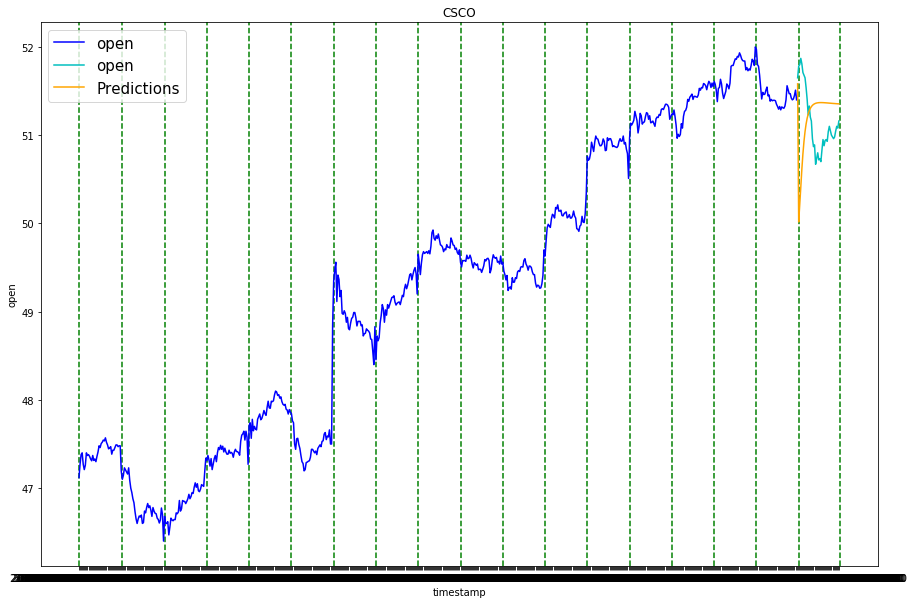

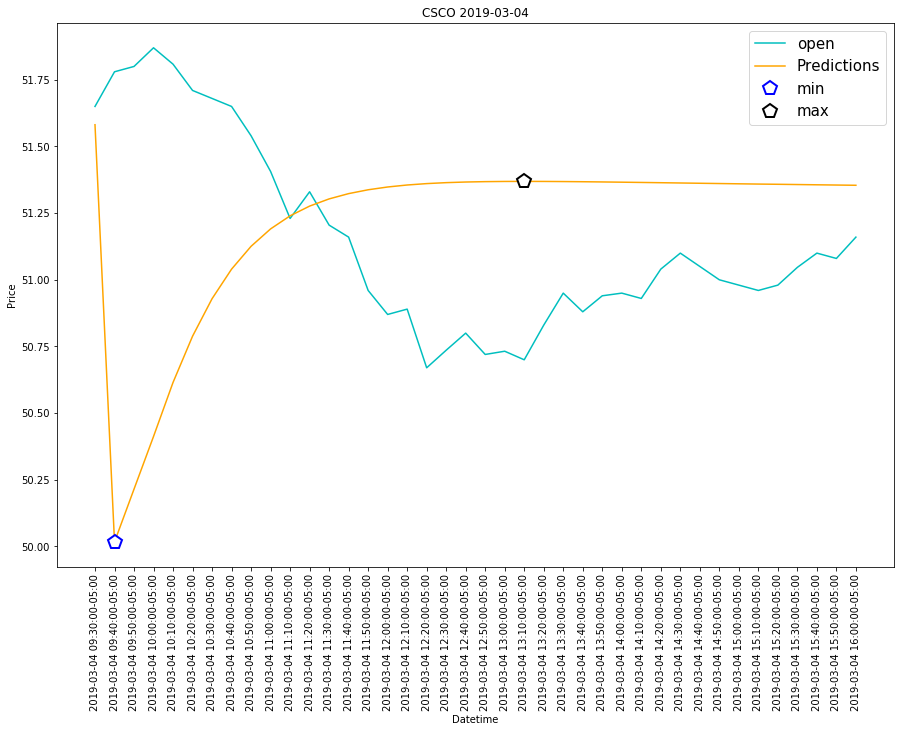

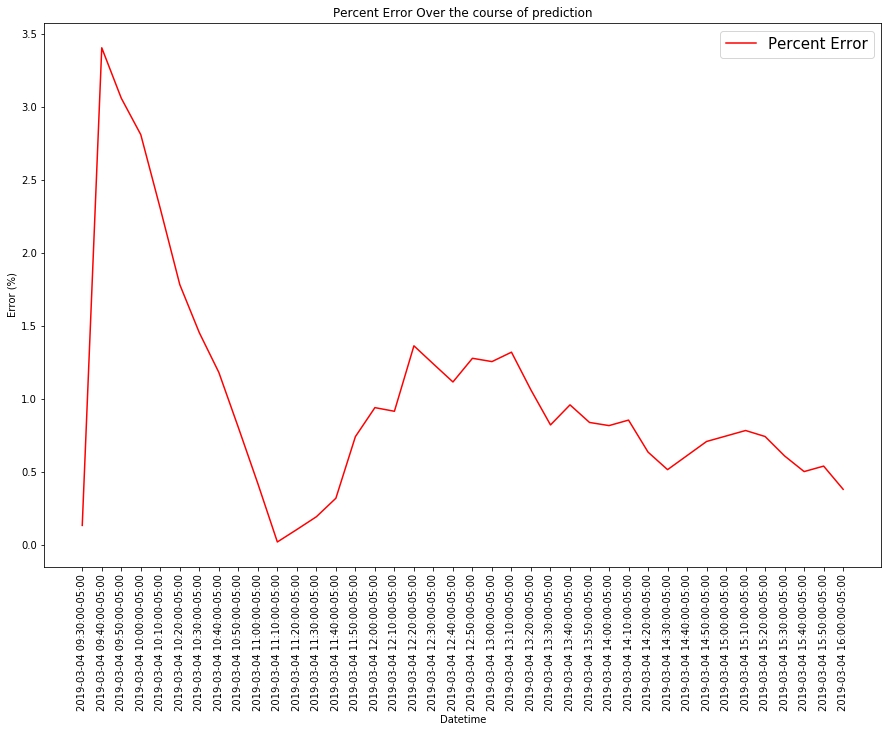

In [22]:
symbol = 'CSCO'
data_points = ['open','close','low','high','volume']
sensitivity = 150

current_stock_df, new_data, day_split = manipulated_data(symbol, data_points) #symbol and what to use
training_data_split = set_data_split(current_stock_df)

create_LSTM_model(new_data, sensitivity, data_points, training_data_split, day_split) #formatted data, and epoch sensitivity, what to use 


[0, 41, 81, 121, 161, 201, 241, 281, 321, 361, 401, 441, 481, 521, 561, 601, 641, 681, 720]


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/150
605/605 [==============================] - 6s 10ms/step - loss: 0.0329
Epoch 2/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0074
Epoch 3/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0049
Epoch 4/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0041
Epoch 5/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0040
Epoch 6/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0037
Epoch 7/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0035
Epoch 8/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0033
Epoch 9/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0032
Epoch 10/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0029
Epoch 11/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0028
Epoch 12/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0028
Epoch 13/150

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

                              open    close      low     high   volume  \
timestamp                                                                
2019-03-04 09:30:00-05:00    163.9   165.83   163.83    165.9  1391535   
2019-03-04 09:40:00-05:00   165.84  166.074    165.6   166.29  1175632   
2019-03-04 09:50:00-05:00   166.08   165.71   165.55   166.17   690716   
2019-03-04 10:00:00-05:00   165.71   165.52   165.43      166   537739   
2019-03-04 10:10:00-05:00  165.537   165.36   165.05   165.65   526143   
2019-03-04 10:20:00-05:00   165.38   165.71   165.17   165.78   281939   
2019-03-04 10:30:00-05:00   165.71   165.52   165.29    165.8   207363   
2019-03-04 10:40:00-05:00  165.533   166.19    165.5   166.28   441170   
2019-03-04 10:50:00-05:00   166.22   166.17   166.13  166.825   558054   
2019-03-04 11:00:00-05:00   166.17   165.51   165.32   166.25   399382   
2019-03-04 11:10:00-05:00   165.52   165.46   165.11  165.651   321480   
2019-03-04 11:20:00-05:00   165.42   1

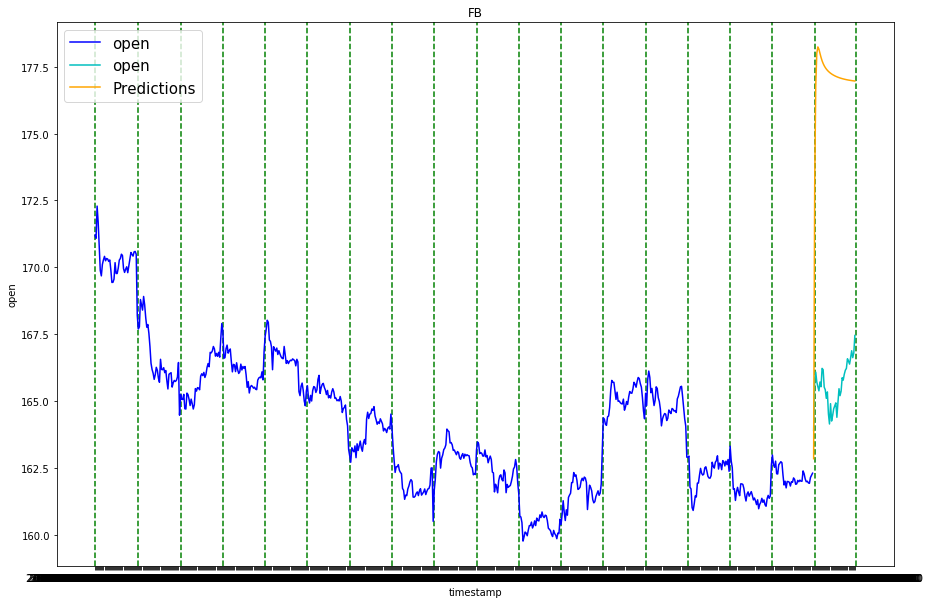

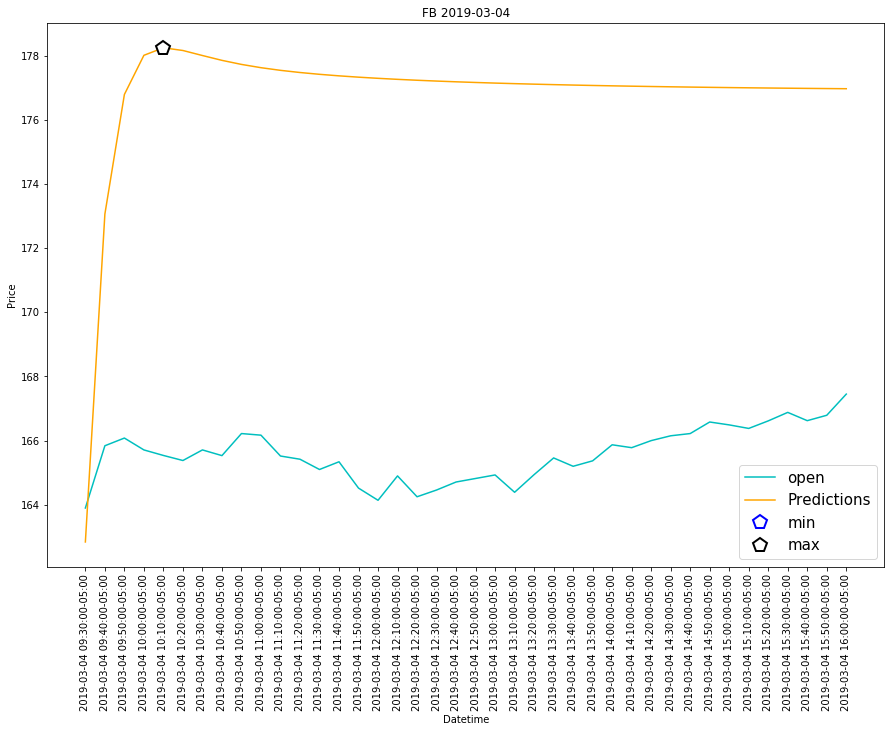

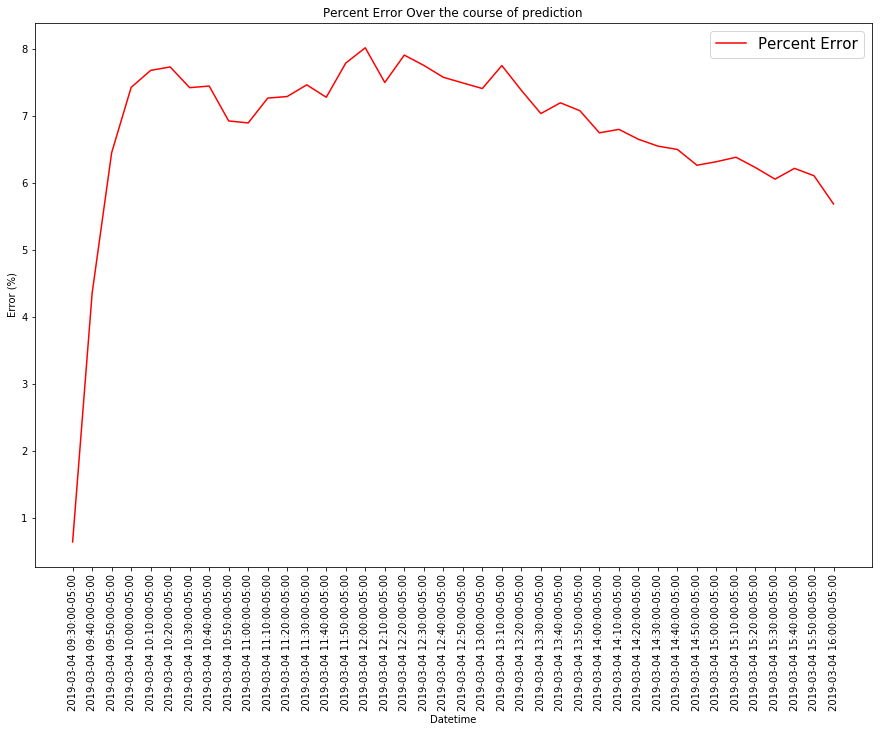

In [23]:
symbol = 'FB'
data_points = ['open','close','low','high','volume']
sensitivity = 150

current_stock_df, new_data, day_split = manipulated_data(symbol, data_points) #symbol and what to use
training_data_split = set_data_split(current_stock_df)

create_LSTM_model(new_data, sensitivity, data_points, training_data_split, day_split) #formatted data, and epoch sensitivity, what to use 


[0, 41, 81, 121, 161, 201, 241, 281, 321, 361, 401, 441, 481, 521, 561, 601, 641, 681, 720]


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/150
605/605 [==============================] - 7s 11ms/step - loss: 0.0441
Epoch 2/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0103
Epoch 3/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0065
Epoch 4/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0054
Epoch 5/150
605/605 [==============================] - 4s 6ms/step - loss: 0.0052
Epoch 6/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0047
Epoch 7/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0045
Epoch 8/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0041
Epoch 9/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0039
Epoch 10/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0037
Epoch 11/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0036
Epoch 12/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0035
Epoch 13/150

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

                              open    close      low     high  volume  \
timestamp                                                               
2019-03-04 09:30:00-05:00  1154.56  1158.41  1154.15     1159   86336   
2019-03-04 09:40:00-05:00  1158.65  1160.69  1158.35  1165.52   66693   
2019-03-04 09:50:00-05:00   1160.7  1165.18  1160.15   1165.2   36652   
2019-03-04 10:00:00-05:00     1165  1162.03  1161.93  1165.13   18605   
2019-03-04 10:10:00-05:00  1162.48  1157.22  1156.04  1162.99   33435   
2019-03-04 10:20:00-05:00     1158  1158.47  1155.44  1158.65   26793   
2019-03-04 10:30:00-05:00  1158.53  1156.23   1155.5  1158.71   19028   
2019-03-04 10:40:00-05:00  1156.44  1157.93  1155.94     1159   13594   
2019-03-04 10:50:00-05:00  1157.73  1155.16  1154.76  1158.18   20420   
2019-03-04 11:00:00-05:00  1155.16  1151.03  1150.28  1156.59   37028   
2019-03-04 11:10:00-05:00  1150.82  1151.46     1150   1153.3   24334   
2019-03-04 11:20:00-05:00  1151.57  1146.56  1146.5

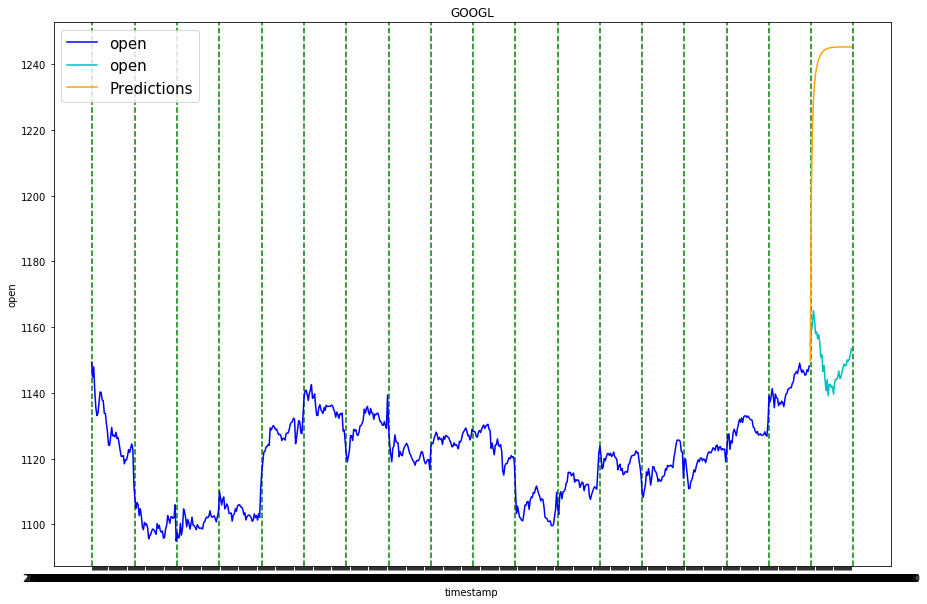

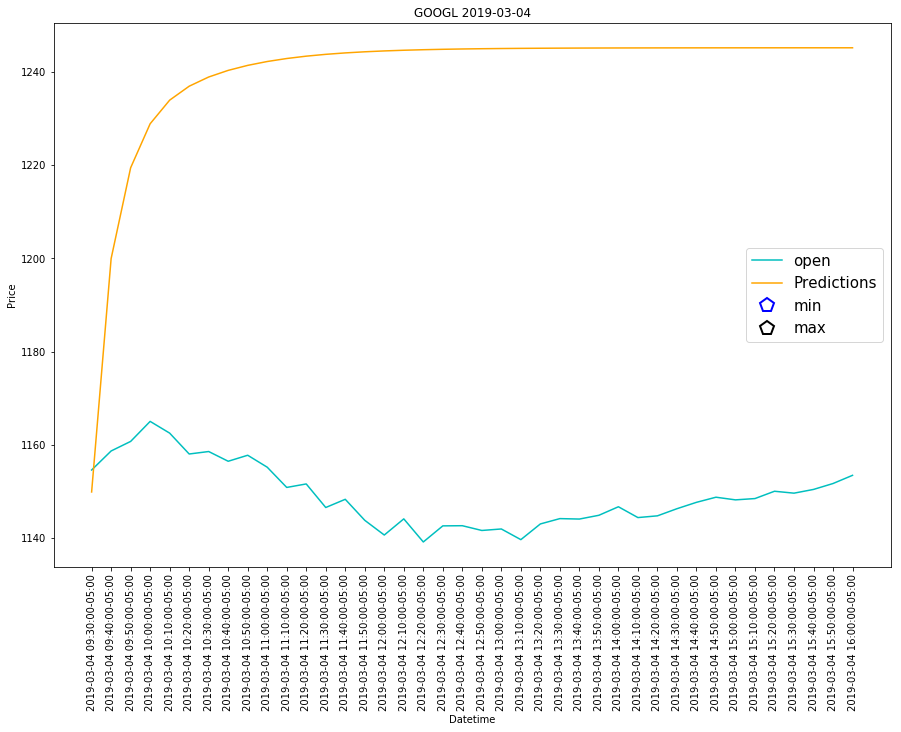

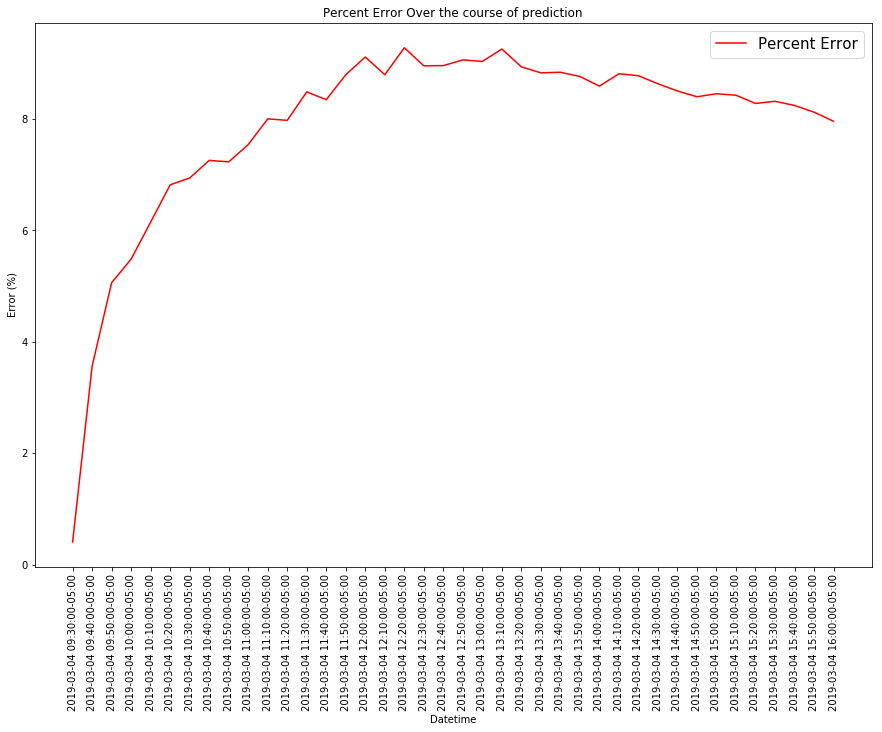

In [24]:
symbol = 'GOOGL'
data_points = ['open','close','low','high','volume']
sensitivity = 150

current_stock_df, new_data, day_split = manipulated_data(symbol, data_points) #symbol and what to use
training_data_split = set_data_split(current_stock_df)

create_LSTM_model(new_data, sensitivity, data_points, training_data_split, day_split) #formatted data, and epoch sensitivity, what to use 


[0, 40, 80, 120, 160, 200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 719]


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/150
604/604 [==============================] - 7s 11ms/step - loss: 0.0907
Epoch 2/150
604/604 [==============================] - 3s 5ms/step - loss: 0.0122
Epoch 3/150
604/604 [==============================] - 3s 5ms/step - loss: 0.0036
Epoch 4/150
604/604 [==============================] - 3s 5ms/step - loss: 0.0023
Epoch 5/150
604/604 [==============================] - 3s 5ms/step - loss: 0.0021
Epoch 6/150
604/604 [==============================] - 3s 6ms/step - loss: 0.0021
Epoch 7/150
604/604 [==============================] - 3s 5ms/step - loss: 0.0020
Epoch 8/150
604/604 [==============================] - 3s 5ms/step - loss: 0.0019
Epoch 9/150
604/604 [==============================] - 3s 5ms/step - loss: 0.0020
Epoch 10/150
604/604 [==============================] - 3s 5ms/step - loss: 0.0019
Epoch 11/150
604/604 [==============================] - 3s 5ms/step - loss: 0.0019
Epoch 12/150
604/604 [==============================] - 3s 5ms/step - loss: 0.0019
Epoch 13/150

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                              open    close     low     high   volume  \
timestamp                                                               
2019-03-04 09:30:00-05:00    53.75   53.975   53.67     54.1  1476199   
2019-03-04 09:40:00-05:00    53.98    53.91  53.835   54.025   378173   
2019-03-04 09:50:00-05:00    53.91    53.84   53.74    53.92   375824   
2019-03-04 10:00:00-05:00    53.84    53.71   53.67    53.86   410105   
2019-03-04 10:10:00-05:00   53.715   53.745   53.64   53.755   315978   
2019-03-04 10:20:00-05:00    53.74    53.83   53.71    53.84   310485   
2019-03-04 10:30:00-05:00    53.84    53.84  53.805    53.89   446043   
2019-03-04 10:40:00-05:00   53.835    53.84   53.75    53.87   295471   
2019-03-04 10:50:00-05:00    53.84    53.73    53.7    53.84   436984   
2019-03-04 11:00:00-05:00    53.72    53.73    53.7   53.825   460933   
2019-03-04 11:10:00-05:00    53.73    53.68   53.62    53.73   305605   
2019-03-04 11:20:00-05:00    53.68   53.595   53.54

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


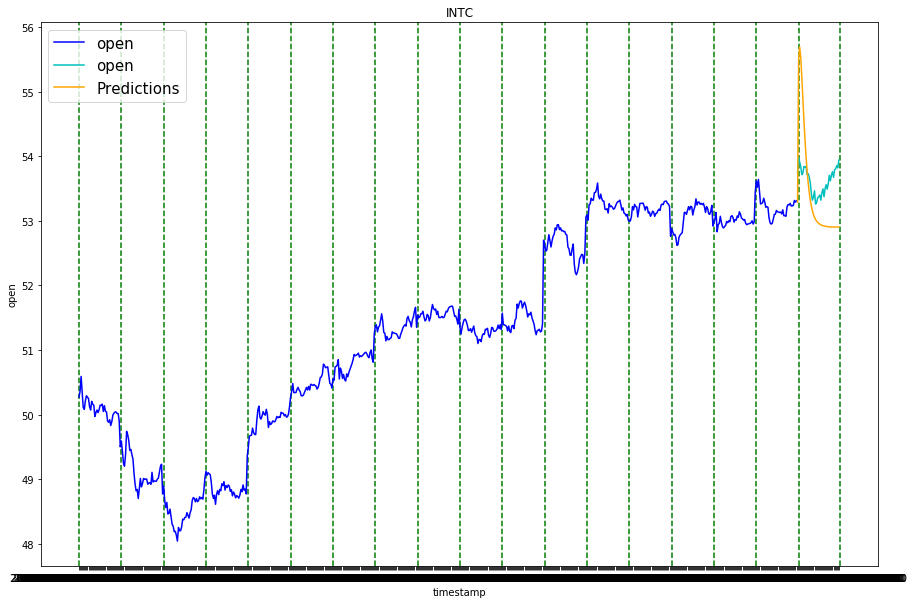

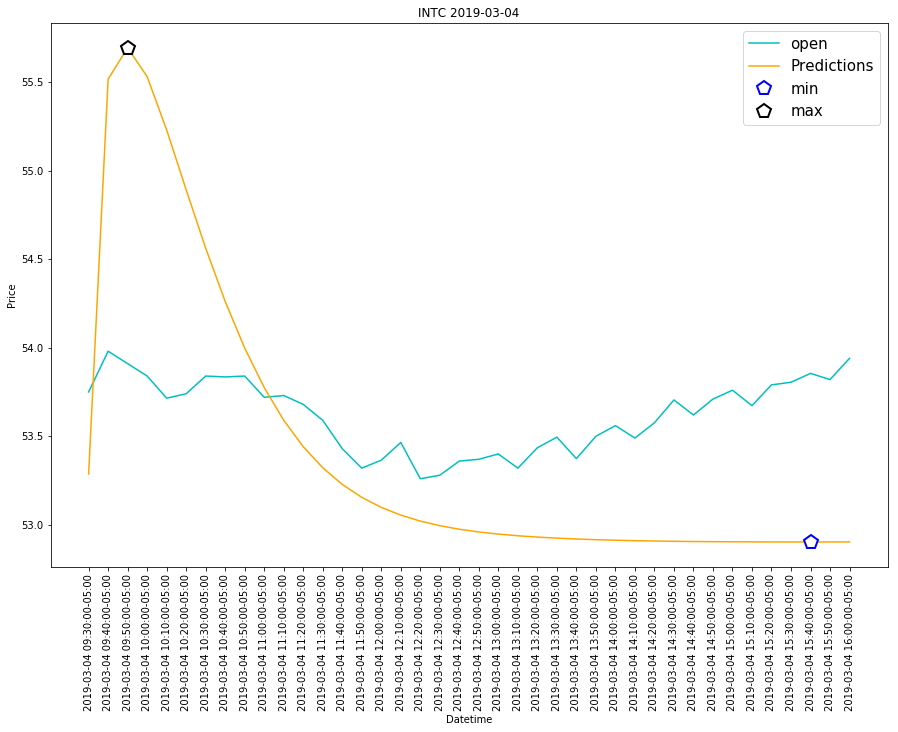

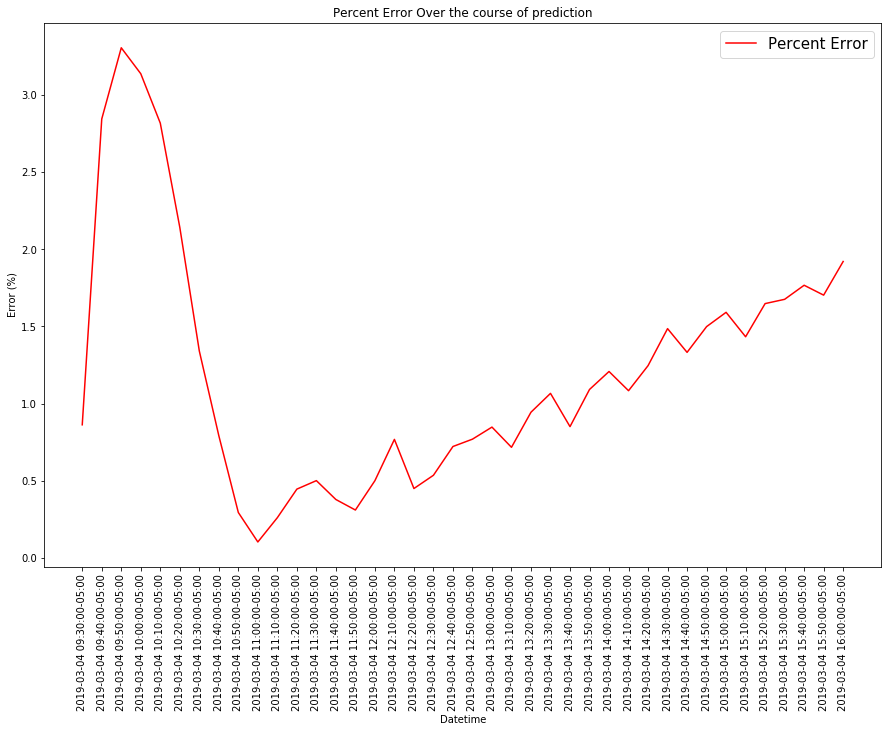

In [25]:
symbol = 'INTC'
data_points = ['open','close','low','high','volume']
sensitivity = 150

current_stock_df, new_data, day_split = manipulated_data(symbol, data_points) #symbol and what to use
training_data_split = set_data_split(current_stock_df)

create_LSTM_model(new_data, sensitivity, data_points, training_data_split, day_split) #formatted data, and epoch sensitivity, what to use 


[0, 41, 81, 121, 161, 201, 241, 281, 321, 361, 401, 441, 481, 521, 561, 601, 641, 681, 720]


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/150
605/605 [==============================] - 7s 12ms/step - loss: 0.0749
Epoch 2/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0087
Epoch 3/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0029
Epoch 4/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0024
Epoch 5/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0022
Epoch 6/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0022
Epoch 7/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0021
Epoch 8/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0020
Epoch 9/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0020
Epoch 10/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0020
Epoch 11/150
605/605 [==============================] - 3s 6ms/step - loss: 0.0020
Epoch 12/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0018
Epoch 13/150

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

                              open    close      low     high   volume  \
timestamp                                                                
2019-03-04 09:30:00-05:00   113.02   112.97  112.745   113.25  1405794   
2019-03-04 09:40:00-05:00   112.97  113.075   112.96    113.2   721170   
2019-03-04 09:50:00-05:00  113.067  113.155   112.93    113.2   575912   
2019-03-04 10:00:00-05:00   113.15   112.94  112.903    113.2   655779   
2019-03-04 10:10:00-05:00  112.945   112.77  112.725  112.985   800045   
2019-03-04 10:20:00-05:00   112.78   112.86   112.74   112.89   310308   
2019-03-04 10:30:00-05:00   112.87   112.74   112.66  112.915   306601   
2019-03-04 10:40:00-05:00  112.735  112.685  112.615   112.84   420708   
2019-03-04 10:50:00-05:00   112.69   112.23   112.22   112.71   613426   
2019-03-04 11:00:00-05:00   112.23  111.894  111.848   112.32   584202   
2019-03-04 11:10:00-05:00   111.89    112.1   111.85  112.137   576483   
2019-03-04 11:20:00-05:00  112.095   1

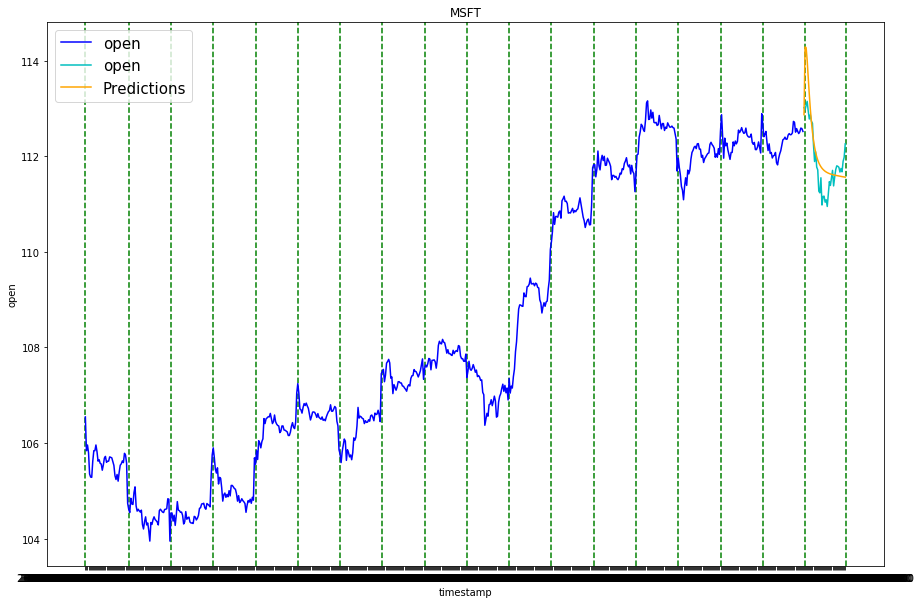

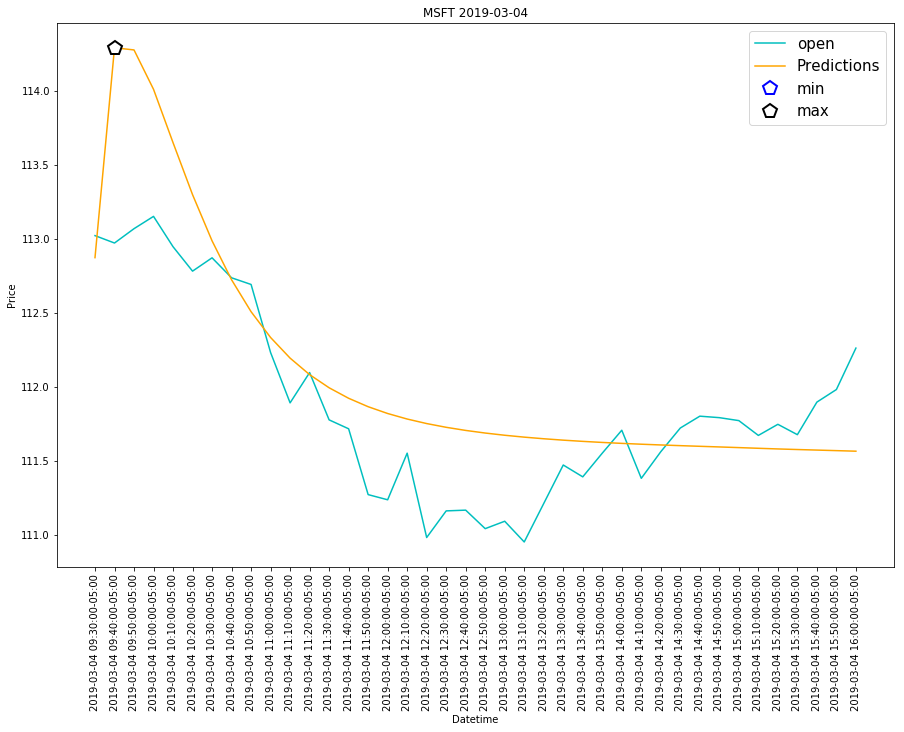

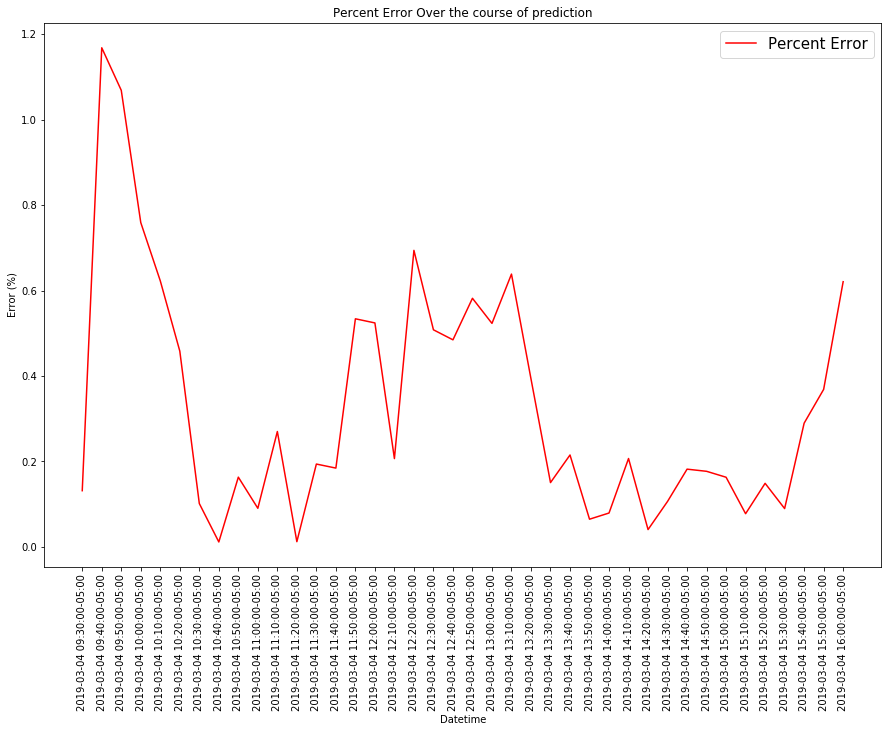

In [26]:
symbol = 'MSFT'
data_points = ['open','close','low','high','volume']
sensitivity = 150

current_stock_df, new_data, day_split = manipulated_data(symbol, data_points) #symbol and what to use
training_data_split = set_data_split(current_stock_df)

create_LSTM_model(new_data, sensitivity, data_points, training_data_split, day_split) #formatted data, and epoch sensitivity, what to use 


[0, 40, 79, 118, 158, 198, 238, 277, 316, 355, 395, 434, 473, 512, 551, 590, 629, 668, 706]


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/150
592/592 [==============================] - 7s 13ms/step - loss: 0.1248
Epoch 2/150
592/592 [==============================] - 3s 6ms/step - loss: 0.0120
Epoch 3/150
592/592 [==============================] - 3s 5ms/step - loss: 0.0050
Epoch 4/150
592/592 [==============================] - 3s 6ms/step - loss: 0.0033
Epoch 5/150
592/592 [==============================] - 3s 5ms/step - loss: 0.0027
Epoch 6/150
592/592 [==============================] - 3s 5ms/step - loss: 0.0026
Epoch 7/150
592/592 [==============================] - 3s 6ms/step - loss: 0.0027
Epoch 8/150
592/592 [==============================] - 3s 5ms/step - loss: 0.0025
Epoch 9/150
592/592 [==============================] - 3s 5ms/step - loss: 0.0025
Epoch 10/150
592/592 [==============================] - 3s 5ms/step - loss: 0.0025
Epoch 11/150
592/592 [==============================] - 3s 5ms/step - loss: 0.0028
Epoch 12/150
592/592 [==============================] - 3s 6ms/step - loss: 0.0026
Epoch 13/150

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

                              open    close      low     high  volume  \
timestamp                                                               
2019-03-04 09:30:00-05:00   139.99   139.94   139.65   140.08   76321   
2019-03-04 09:40:00-05:00  139.915   139.63   139.59   139.92   60348   
2019-03-04 09:50:00-05:00   139.63   139.91    139.5   140.02   39031   
2019-03-04 10:00:00-05:00   139.89   139.82   139.79      140   44120   
2019-03-04 10:10:00-05:00   139.81   139.98   139.65   139.98   27223   
2019-03-04 10:20:00-05:00   139.97    139.9   139.78   139.97   30523   
2019-03-04 10:30:00-05:00    139.9   139.86  139.708   139.96   56471   
2019-03-04 10:40:00-05:00   139.87   139.84   139.73   139.95   49684   
2019-03-04 10:50:00-05:00   139.83   139.59   139.53   139.85   57158   
2019-03-04 11:00:00-05:00   139.59  139.285  139.282   139.61   43869   
2019-03-04 11:10:00-05:00   139.28   139.45   139.27   139.48   48571   
2019-03-04 11:20:00-05:00   139.45   139.15    139.

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


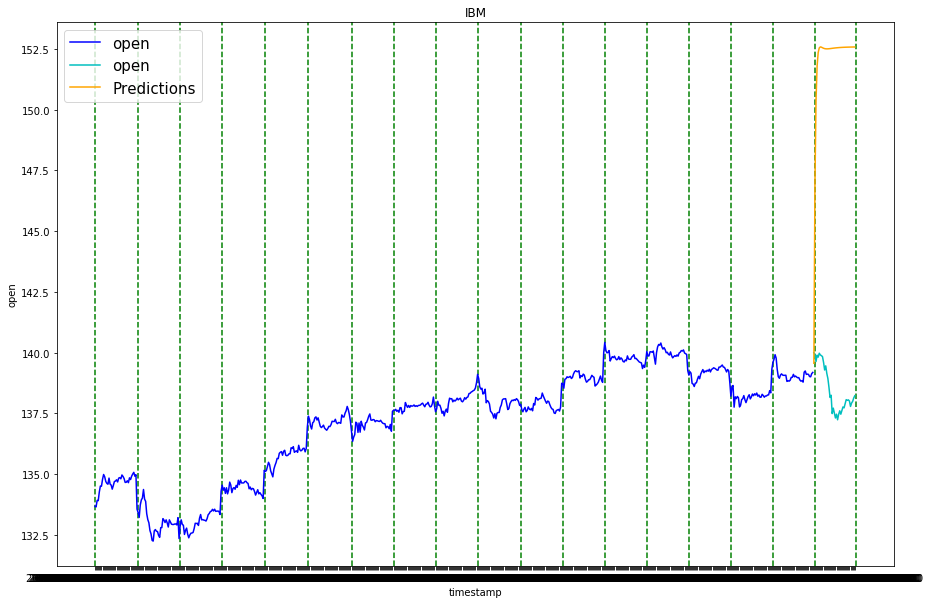

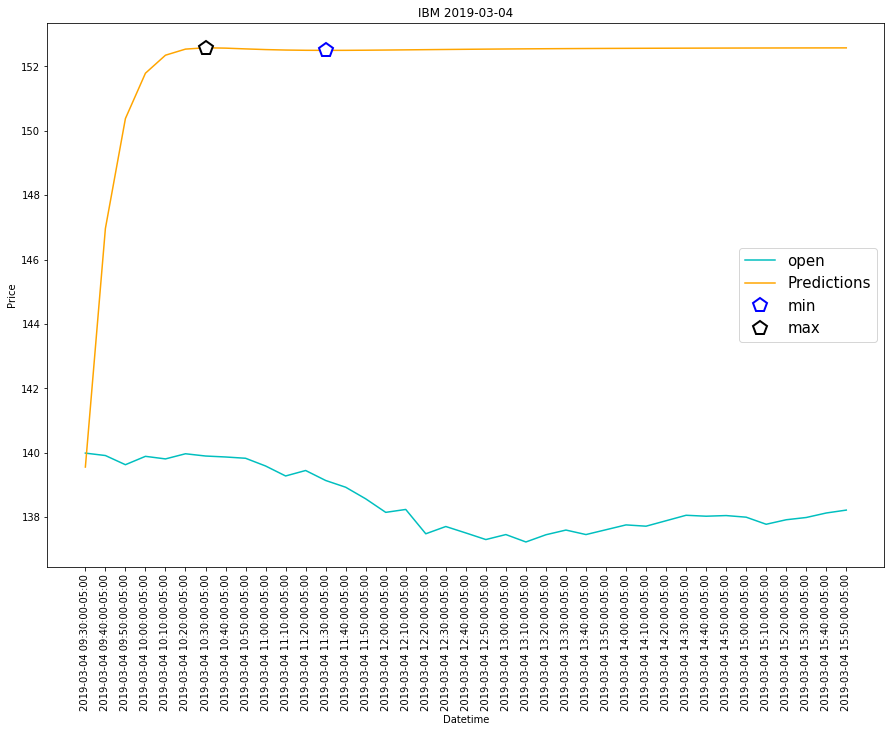

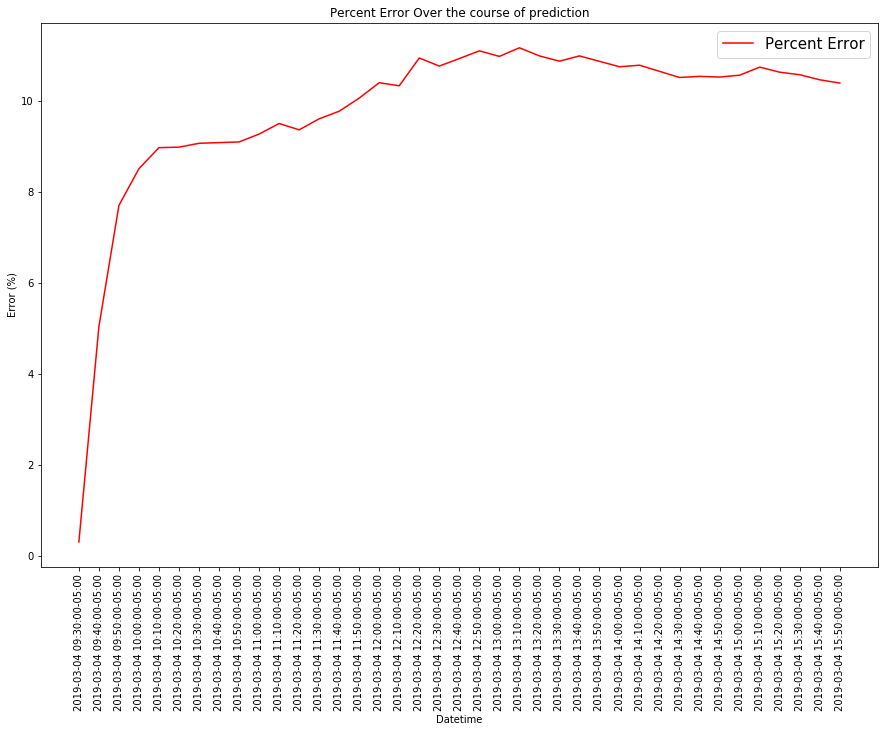

In [27]:
symbol = 'IBM'
data_points = ['open','close','low','high','volume']
sensitivity = 150

current_stock_df, new_data, day_split = manipulated_data(symbol, data_points) #symbol and what to use
training_data_split = set_data_split(current_stock_df)

create_LSTM_model(new_data, sensitivity, data_points, training_data_split, day_split) #formatted data, and epoch sensitivity, what to use 


[0, 40, 79, 119, 158, 197, 237, 277, 316, 355, 395, 434, 473, 512, 551, 590, 630, 669, 708]


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/150
594/594 [==============================] - 8s 13ms/step - loss: 0.1433
Epoch 2/150
594/594 [==============================] - 3s 5ms/step - loss: 0.0151
Epoch 3/150
594/594 [==============================] - 3s 5ms/step - loss: 0.0060
Epoch 4/150
594/594 [==============================] - 3s 5ms/step - loss: 0.0029
Epoch 5/150
594/594 [==============================] - 3s 5ms/step - loss: 0.0024
Epoch 6/150
594/594 [==============================] - 3s 5ms/step - loss: 0.0023
Epoch 7/150
594/594 [==============================] - 3s 5ms/step - loss: 0.0022
Epoch 8/150
594/594 [==============================] - 3s 5ms/step - loss: 0.0022
Epoch 9/150
594/594 [==============================] - 3s 5ms/step - loss: 0.0023
Epoch 10/150
594/594 [==============================] - 3s 5ms/step - loss: 0.0022
Epoch 11/150
594/594 [==============================] - 3s 5ms/step - loss: 0.0022
Epoch 12/150
594/594 [==============================] - 3s 5ms/step - loss: 0.0021
Epoch 13/150

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                             open   close     low     high   volume  \
timestamp                                                             
2019-03-04 09:40:00-05:00   52.67    52.8   52.67   52.845   309092   
2019-03-04 09:50:00-05:00   52.79   52.78   52.69     52.8   287839   
2019-03-04 10:00:00-05:00   52.78   52.46   52.45     52.8   405677   
2019-03-04 10:10:00-05:00   52.47   52.49  52.345    52.52   315531   
2019-03-04 10:20:00-05:00   52.49   52.54   52.47   52.555   217308   
2019-03-04 10:30:00-05:00   52.54  52.415  52.385    52.58   263255   
2019-03-04 10:40:00-05:00  52.425   52.33  52.295    52.43   268574   
2019-03-04 10:50:00-05:00   52.33  52.075   52.07    52.33   396073   
2019-03-04 11:00:00-05:00   52.07  52.055   52.05   52.195   412173   
2019-03-04 11:10:00-05:00  52.055  52.085      52     52.1   366510   
2019-03-04 11:20:00-05:00   52.08   51.92   51.92    52.09   313869   
2019-03-04 11:30:00-05:00   51.93  51.895   51.81    51.96   311606   
2019-0

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


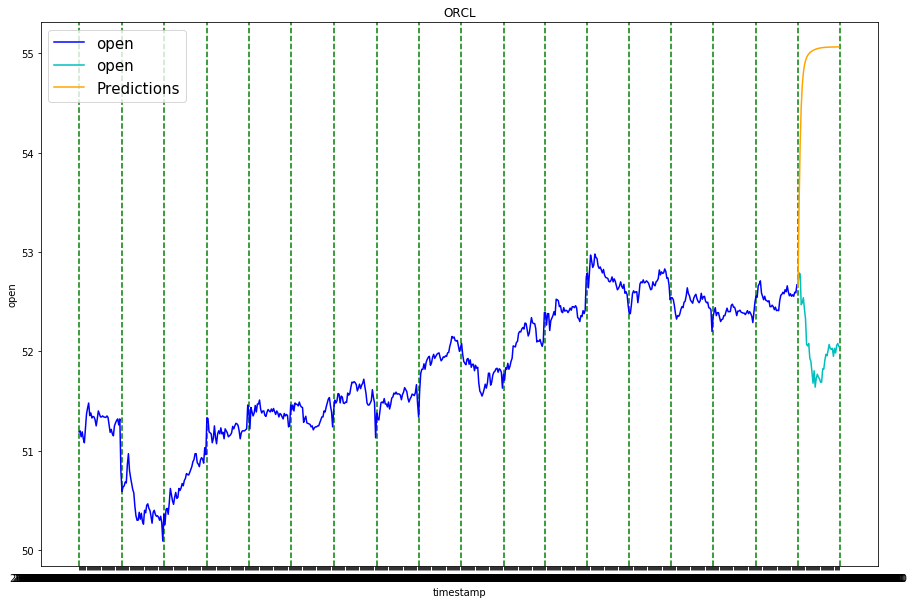

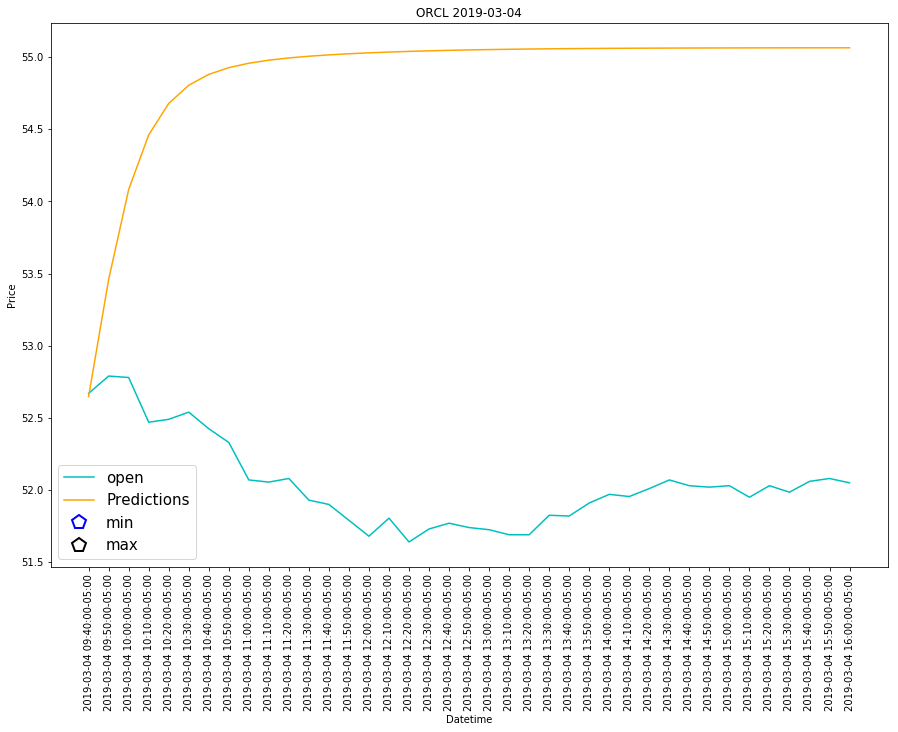

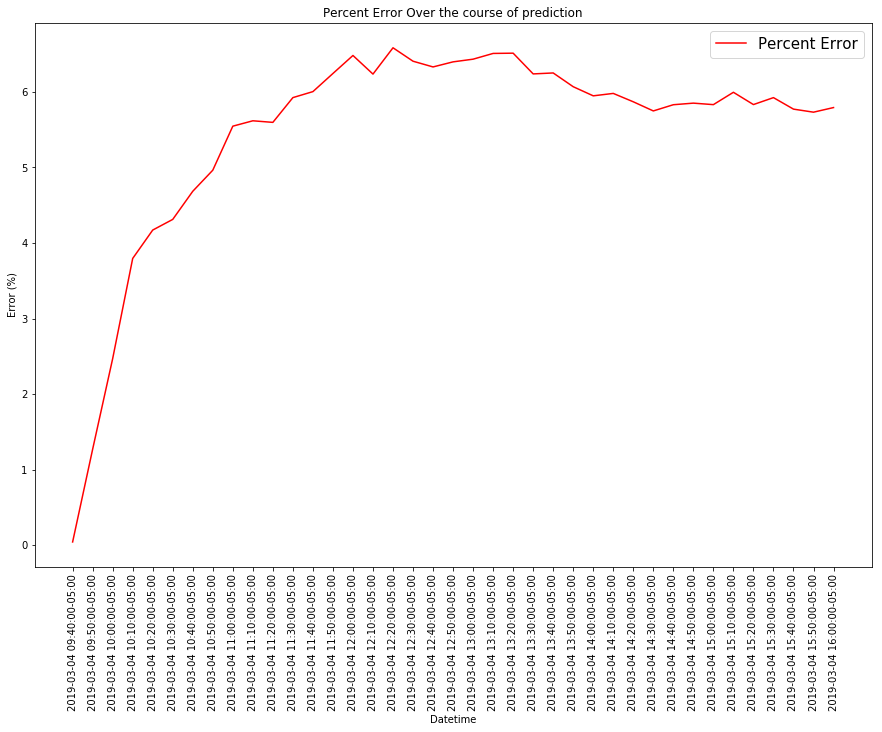

In [28]:
symbol = 'ORCL'
data_points = ['open','close','low','high','volume']
sensitivity = 150

current_stock_df, new_data, day_split = manipulated_data(symbol, data_points) #symbol and what to use
training_data_split = set_data_split(current_stock_df)

create_LSTM_model(new_data, sensitivity, data_points, training_data_split, day_split) #formatted data, and epoch sensitivity, what to use 


[0, 40, 80, 120, 160, 200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 719]


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/150
604/604 [==============================] - 8s 14ms/step - loss: 0.0633
Epoch 2/150
604/604 [==============================] - 3s 6ms/step - loss: 0.0093
Epoch 3/150
604/604 [==============================] - 3s 6ms/step - loss: 0.0049
Epoch 4/150
604/604 [==============================] - 3s 6ms/step - loss: 0.0033
Epoch 5/150
604/604 [==============================] - 3s 6ms/step - loss: 0.0032
Epoch 6/150
604/604 [==============================] - 3s 6ms/step - loss: 0.0030
Epoch 7/150
604/604 [==============================] - 4s 6ms/step - loss: 0.0028
Epoch 8/150
604/604 [==============================] - 3s 6ms/step - loss: 0.0028
Epoch 9/150
604/604 [==============================] - 3s 6ms/step - loss: 0.0027
Epoch 10/150
604/604 [==============================] - 3s 6ms/step - loss: 0.0027
Epoch 11/150
604/604 [==============================] - 3s 6ms/step - loss: 0.0026
Epoch 12/150
604/604 [==============================] - 3s 6ms/step - loss: 0.0027
Epoch 13/150

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

                              open    close      low     high   volume  \
timestamp                                                                
2019-03-04 09:30:00-05:00  53.9526  53.7056  53.6462  54.0713   548026   
2019-03-04 09:40:00-05:00  53.7095  53.4139   53.409  53.7452   347599   
2019-03-04 09:50:00-05:00  53.4238  53.4436  53.3299  53.4979   366584   
2019-03-04 10:00:00-05:00  53.4436  53.3595  53.2706  53.4485   289271   
2019-03-04 10:10:00-05:00  53.3645  53.4386    53.32  53.4436   342743   
2019-03-04 10:20:00-05:00  53.4436  53.3265  53.2557  53.4782   221597   
2019-03-04 10:30:00-05:00  53.3249   53.236  53.2212  53.3793   236693   
2019-03-04 10:40:00-05:00   53.236  53.4804   53.231  53.5078   211815   
2019-03-04 10:50:00-05:00  53.4782  53.3793  53.3497   53.488   173304   
2019-03-04 11:00:00-05:00  53.3793  53.3447  53.3398  53.4188   205088   
2019-03-04 11:10:00-05:00  53.3454  53.3052  53.2212  53.3595   182834   
2019-03-04 11:20:00-05:00  53.3101  53

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


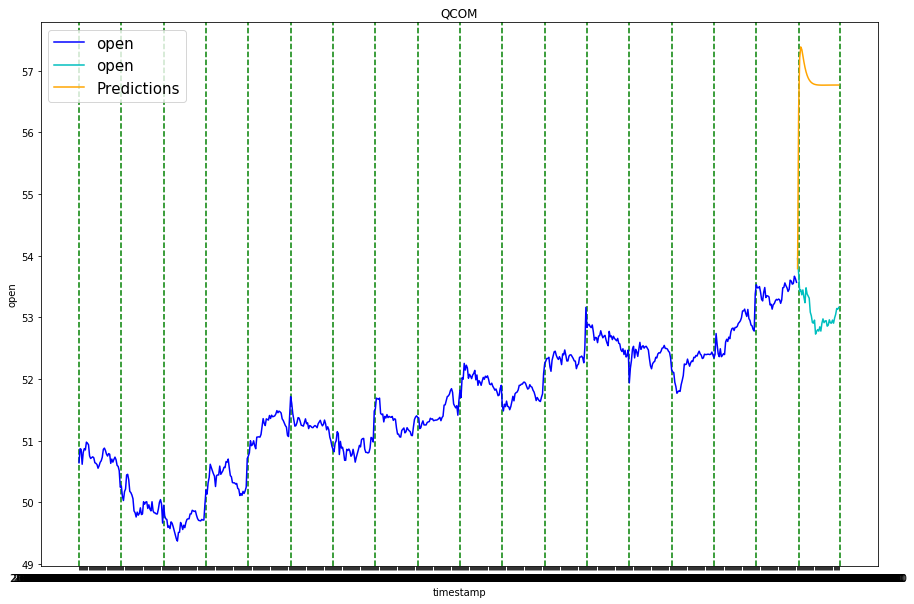

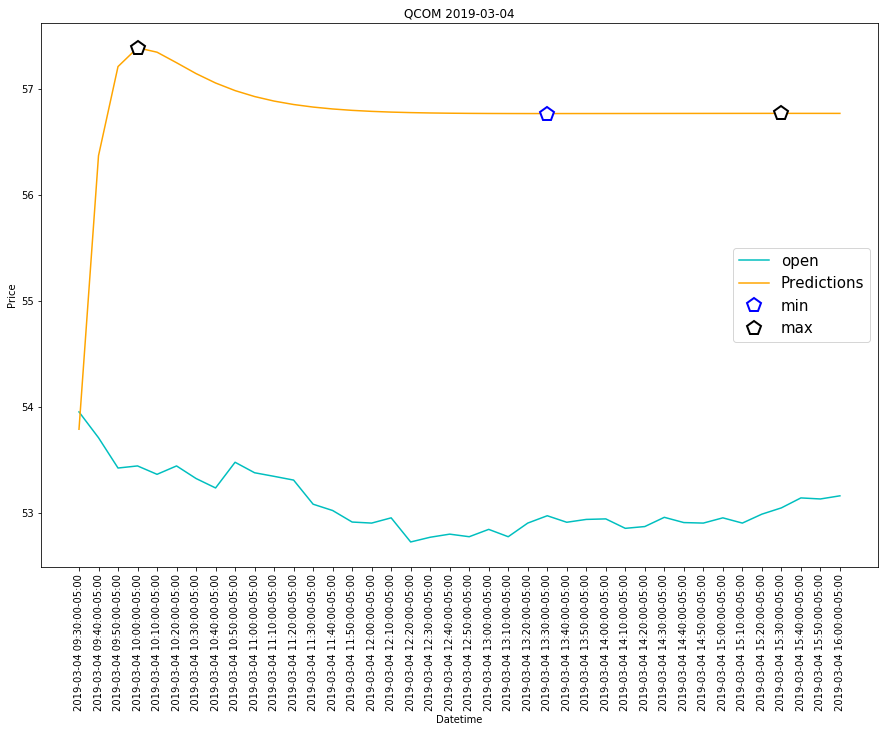

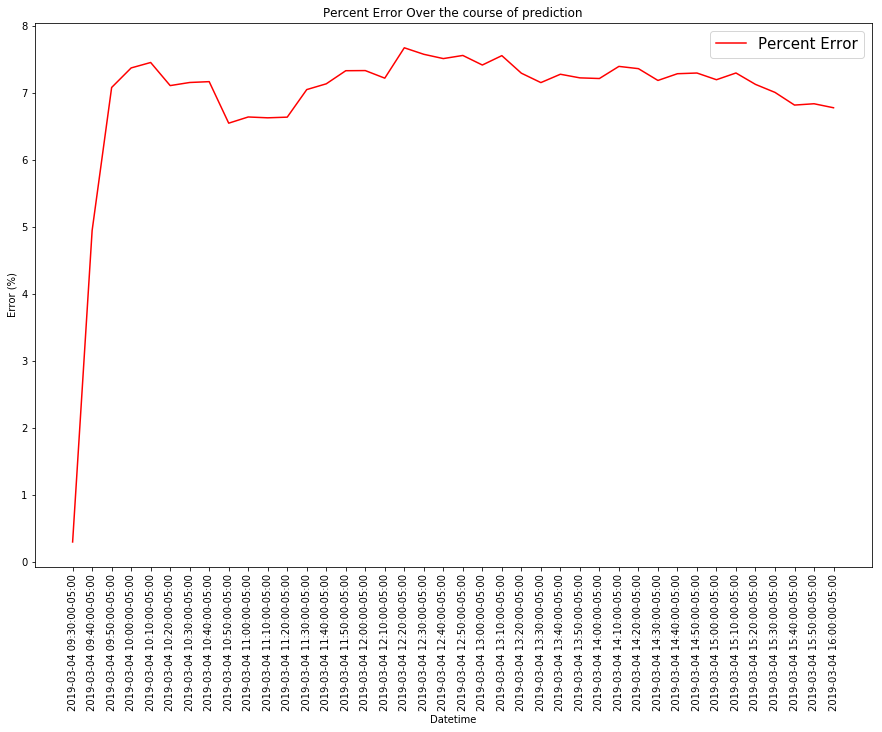

In [29]:
symbol = 'QCOM'
data_points = ['open','close','low','high','volume']
sensitivity = 150

current_stock_df, new_data, day_split = manipulated_data(symbol, data_points) #symbol and what to use
training_data_split = set_data_split(current_stock_df)

create_LSTM_model(new_data, sensitivity, data_points, training_data_split, day_split) #formatted data, and epoch sensitivity, what to use 


[0, 41, 81, 121, 161, 201, 241, 281, 321, 361, 401, 441, 481, 521, 561, 601, 641, 681, 720]


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/150
605/605 [==============================] - 8s 14ms/step - loss: 0.0640
Epoch 2/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0138
Epoch 3/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0097
Epoch 4/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0077
Epoch 5/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0067
Epoch 6/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0064
Epoch 7/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0061
Epoch 8/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0061
Epoch 9/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0054
Epoch 10/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0052
Epoch 11/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0049
Epoch 12/150
605/605 [==============================] - 3s 5ms/step - loss: 0.0048
Epoch 13/150

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                              open    close     low     high   volume  \
timestamp                                                               
2019-03-04 09:30:00-05:00   298.12   297.41   295.2      299   789515   
2019-03-04 09:40:00-05:00  297.287  292.432     292   298.24   827686   
2019-03-04 09:50:00-05:00   292.38   286.62  286.23   292.66  1242311   
2019-03-04 10:00:00-05:00    286.7   288.28     286    289.5   598134   
2019-03-04 10:10:00-05:00   288.58  286.115     286   288.75   494965   
2019-03-04 10:20:00-05:00  286.215  287.776   285.2   288.21   698620   
2019-03-04 10:30:00-05:00   287.75  289.595  287.18   289.86   372315   
2019-03-04 10:40:00-05:00  289.536    288.7  288.41  290.195   364714   
2019-03-04 10:50:00-05:00   288.65   287.89     287   288.69   273888   
2019-03-04 11:00:00-05:00   287.96   287.29     287    289.3   310865   
2019-03-04 11:10:00-05:00  287.255    286.3  285.99   287.32   354385   
2019-03-04 11:20:00-05:00   286.23    285.5  285.03

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


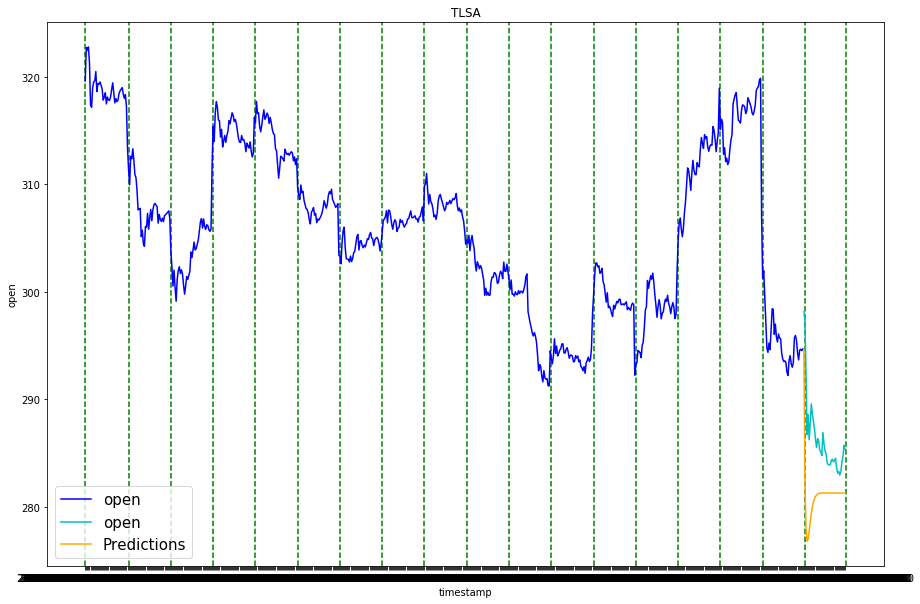

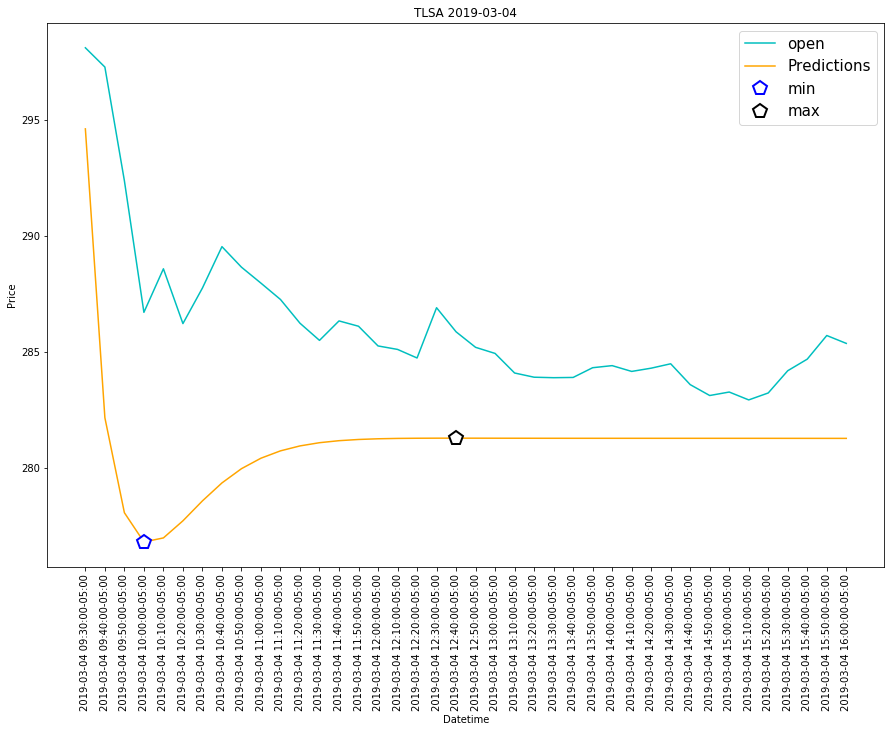

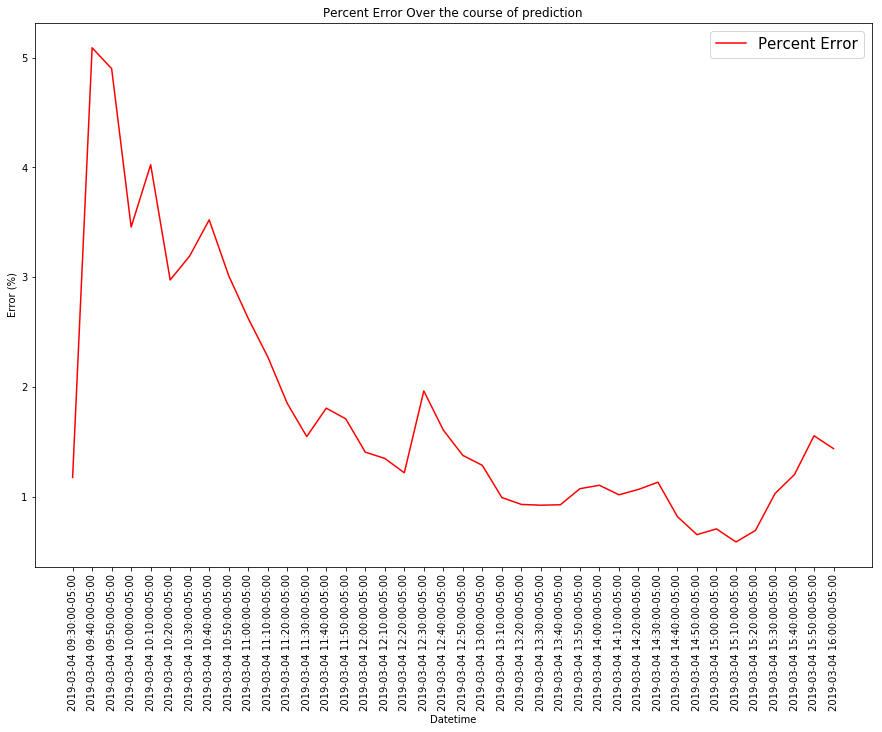

In [30]:
symbol = 'TLSA'
data_points = ['open','close','low','high','volume']
sensitivity = 150

current_stock_df, new_data, day_split = manipulated_data(symbol, data_points) #symbol and what to use
training_data_split = set_data_split(current_stock_df)

create_LSTM_model(new_data, sensitivity, data_points, training_data_split, day_split) #formatted data, and epoch sensitivity, what to use 


[0, 40, 80, 120, 160, 199, 239, 279, 319, 359, 398, 438, 478, 518, 558, 598, 638, 678, 717]


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/150
602/602 [==============================] - 9s 14ms/step - loss: 0.0727
Epoch 2/150
602/602 [==============================] - 3s 5ms/step - loss: 0.0092
Epoch 3/150
602/602 [==============================] - 3s 5ms/step - loss: 0.0029
Epoch 4/150
602/602 [==============================] - 3s 5ms/step - loss: 0.0022
Epoch 5/150
602/602 [==============================] - 3s 5ms/step - loss: 0.0021
Epoch 6/150
602/602 [==============================] - 3s 5ms/step - loss: 0.0021
Epoch 7/150
602/602 [==============================] - 3s 5ms/step - loss: 0.0020
Epoch 8/150
602/602 [==============================] - 3s 5ms/step - loss: 0.0020
Epoch 9/150
602/602 [==============================] - 3s 5ms/step - loss: 0.0020
Epoch 10/150
602/602 [==============================] - 3s 5ms/step - loss: 0.0020
Epoch 11/150
602/602 [==============================] - 3s 5ms/step - loss: 0.0021
Epoch 12/150
602/602 [==============================] - 3s 5ms/step - loss: 0.0020
Epoch 13/150

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

                              open    close      low     high   volume  \
timestamp                                                                
2019-03-04 09:30:00-05:00    57.15    56.82    56.78   57.345   294270   
2019-03-04 09:40:00-05:00   56.815    56.78    56.68    56.83   243959   
2019-03-04 09:50:00-05:00    56.78    56.64     56.6    56.78   321691   
2019-03-04 10:00:00-05:00    56.64   56.551   56.455    56.65   212020   
2019-03-04 10:10:00-05:00    56.55    56.66   56.545   56.685   247242   
2019-03-04 10:20:00-05:00   56.655    56.79   56.655     56.8   166051   
2019-03-04 10:30:00-05:00     56.8    56.66  56.5913     56.8   177905   
2019-03-04 10:40:00-05:00    56.67    56.57     56.5   56.675   178161   
2019-03-04 10:50:00-05:00    56.57   56.555    56.53    56.61   226891   
2019-03-04 11:00:00-05:00    56.56   56.545    56.51    56.59   301337   
2019-03-04 11:10:00-05:00  56.5499    56.55    56.49   56.575   205929   
2019-03-04 11:20:00-05:00    56.55  56

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


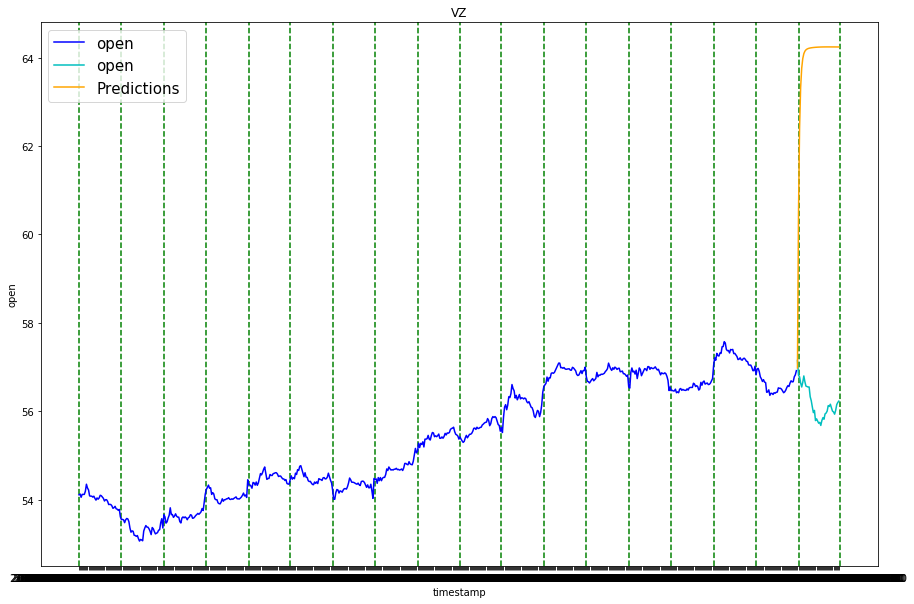

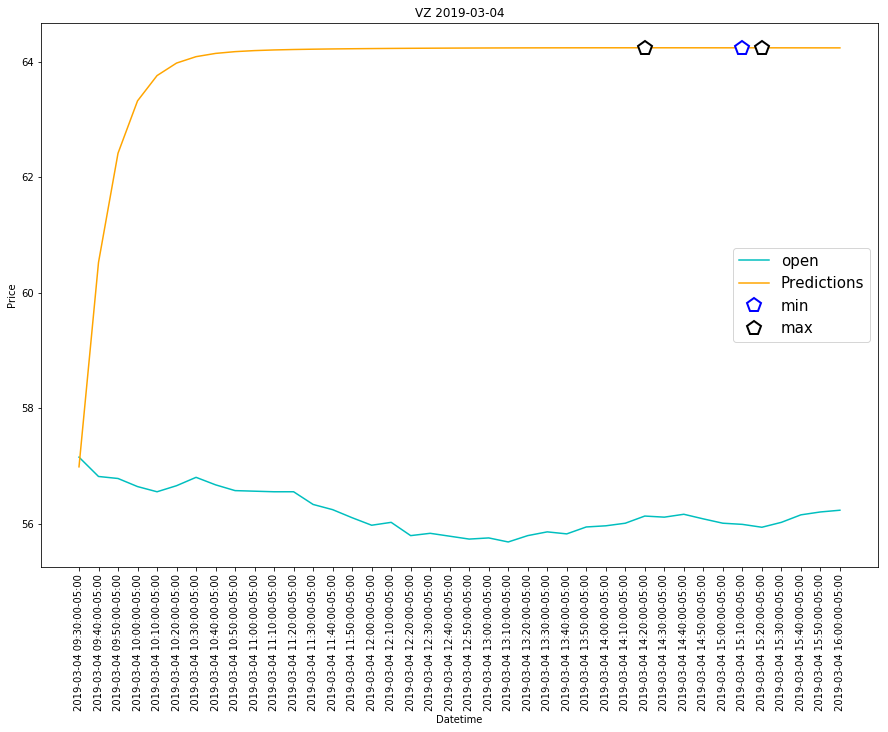

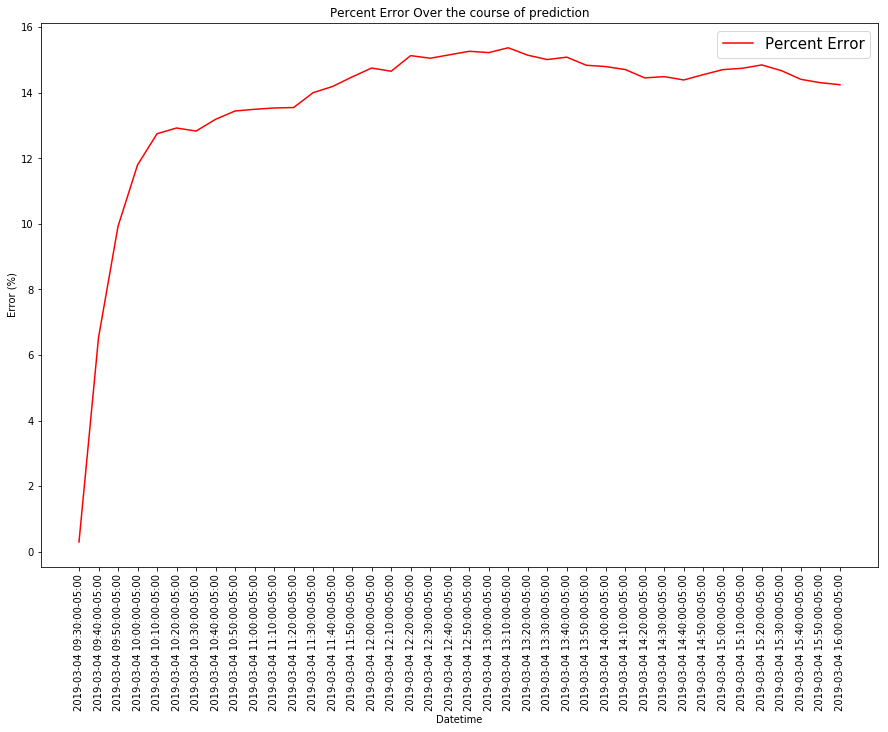

In [31]:
symbol = 'VZ'
data_points = ['open','close','low','high','volume']
sensitivity = 150

current_stock_df, new_data, day_split = manipulated_data(symbol, data_points) #symbol and what to use
training_data_split = set_data_split(current_stock_df)

create_LSTM_model(new_data, sensitivity, data_points, training_data_split, day_split) #formatted data, and epoch sensitivity, what to use 
